# Week 3 - Classification

### Answer from Qian Zhang

This week, we shift from gathering human textual classifications through crowdsourcing, to using machine learning models and algorithms that train on those human classifications and extend them to documents far too numerous to read. If you recall, *clustering* allows us to stably partition text data (e.g., documents, turns of conversation) according to all patterns of covariation among available text features. *Classification*, by contrast, partitions text data according to only those features and their variation that enable us to mimic and extrapolate human annotations.

In this notebook, we will show how to use a variety of classification methods, including Naïve Bayes, Logistic regression, K-nearest neighbor, decision trees and random forests, support vector machines and even a simple neural network, the perceptron. We will also demonstrate ensemble techniques that can link several such methods into a single, more accurate, classification pipeline. We will finally learn to use conventions and metrics to evaluate classifier performance on out-of-sample data. 

For this notebook we will be using the following packages.

In [1]:
#Special module written for this class
#This provides access to data and to helper functions from previous weeks
#Make sure you update it before starting this notebook
import lucem_illud_2020 #pip install -U git+git://github.com/Computational-Content-Analysis-2020/lucem_illud_2020.git

#All these packages need to be installed from pip
#For ML
import sklearn
import sklearn.naive_bayes
import sklearn.tree
import sklearn.ensemble
import sklearn.neural_network
import sklearn.decomposition
import sklearn.datasets

import numpy as np #arrays
import matplotlib.pyplot as plt #Plots
import matplotlib.colors # For nice colours
import seaborn #Makes plots look nice, also heatmaps
import scipy as sp #for interp

#These are from the standard library
import collections
import os
import os.path
import random
import re
import glob
import pandas
import requests
import json
import math

#This 'magic' command makes the plots work better
#in the notebook, don't use it outside of a notebook.
#Also you can ignore the warning
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

# Simple Simulated Examples

Here we create a sandbox for you to explore different types of classified data and how different statistical classifiers perform on each type.

## Generating example data

We start by loading one of the "cartoon" or simplified data sets and then dividing it into training and testing sets. To maximize our ability to visualize, each dataset involves two classes, colored yellow and blue, arrayed along two dimensions (`x` and `y`). 

The four data patterns include: 
+ `random` in which the two classes are randomly distributed across both dimensions
+ `andSplit` in which the two classes are linearly split along one of two dimensions (e.g., men like Adidas)
+ `xorSplit` in which the two classes are split, oppositely, along each dimension (e.g., old ladies and young men like Nikes)
+ `targetSplit` in which one class is nested within the other in two dimensions (e.g., middle aged, middle income people like vintage Mustangs)
+ `multiBlobs` in which 5 classes are placed as bivariate Gaussians at random locations

`noise` is a variable [0-1] that ranges from no noise in the prescribed pattern [0] to complete noise/randomness [1].

Uncomment (remove the # in front of) each dataset, one at a time, and then run the cell and subsequent cells to examine how each machine learning approach captures each pattern.

In [2]:
noise = .2

#dfTrain, dfTest = lucem_illud_2020.trainTestSplit(lucem_illud_2020.random())
#dfTrain, dfTest = lucem_illud_2020.trainTestSplit(lucem_illud_2020.andSplit(noise))
#dfTrain, dfTest = lucem_illud_2020.trainTestSplit(lucem_illud_2020.xorSplit(noise)) #Please try this one
#dfTrain, dfTest = lucem_illud_2020.trainTestSplit(lucem_illud_2020.targetSplit(noise))
dfTrain, dfTest = lucem_illud_2020.trainTestSplit(lucem_illud_2020.multiBlobs(noise))

We can easily visualize the rendered datasets because they are generated in two dimensions.

Let's see what dfTrain, a simulated data that we just made, looks like

In [3]:
dfTrain

,vect,category
1046,"[7.8401031292037775, 9.2187884018385]",1
552,"[7.114129111483445, 6.963353574857715]",1
2145,"[2.7795904697960463, -3.508798213548656]",4
1716,"[3.6339868776629616, 2.436659699943639]",3
2055,"[5.92584269759507, 7.616513816311026]",1
...,...,...
2078,"[6.121750184775245, 5.659425913669105]",0
405,"[5.476434127466219, 8.85090486000088]",1
1019,"[7.688084837029386, 3.0635685895952163]",0
1743,"[0.6279792246659139, 1.0300568791264846]",2


So, dfTrain has two columns, vect and category. 

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

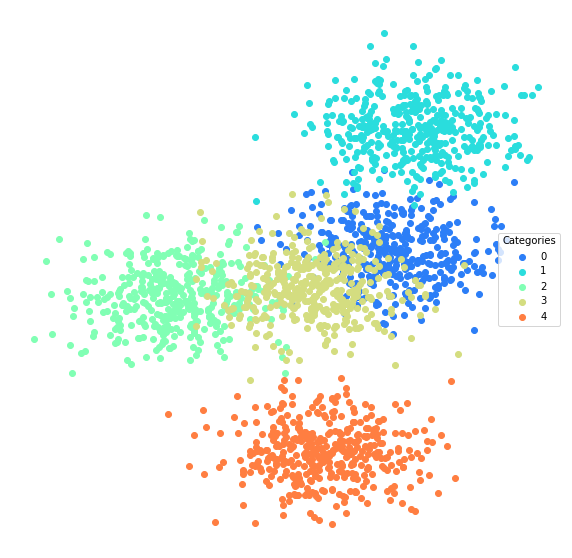

In [4]:
lucem_illud_2020.plotter(dfTrain)

## Training a Machine Learning algorithm

We can now pick a model, there are many more options in `scikit-learn`. These are just a few examples, which array along the machine learning "tribes" described in Pedro Domingos _The Master Algorithm_.

Uncomment (remove the # in front of) each algorithm one at a time, then run the cell and subsequent cells to evaluate how it learns to understand the data.

In [5]:
#Bayes
#clf = sklearn.naive_bayes.GaussianNB()

#Analogizes
#clf = sklearn.svm.SVC(kernel = 'linear', probability = True) #slow, set probability = False to speed up
#clf = sklearn.svm.SVC(kernel = 'poly', degree = 3, probability = True) #slower
clf = sklearn.neighbors.KNeighborsClassifier(5, weights='distance')# k, 'distance' or 'uniform'

#Classical Regression
#clf = sklearn.linear_model.LogisticRegression()

#Symbolists
#clf = sklearn.tree.DecisionTreeClassifier()
#clf = sklearn.ensemble.RandomForestClassifier()

#Connectionists
#clf = sklearn.neural_network.MLPClassifier()

#Ensemble
#clf = sklearn.ensemble.GradientBoostingClassifier()

We're using sklearn here. What is sklearn? It's an open source machine learning library for Python. We use sklearn because it features various machine learning algorithms and it works well with NumPy library. You don't need to understand the sklearn package in detail for the moment, but let's see what methods and attributes sklearn has, because we're going to use some of them:

In [6]:
dir(sklearn)

['__SKLEARN_SETUP__',
 '__all__',
 '__builtins__',
 '__cached__',
 '__check_build',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_config',
 '_distributor_init',
 'base',
 'clone',
 'config_context',
 'datasets',
 'decomposition',
 'dummy',
 'ensemble',
 'exceptions',
 'externals',
 'feature_extraction',
 'get_config',
 'linear_model',
 'logger',
 'logging',
 'metrics',
 'model_selection',
 'naive_bayes',
 'neighbors',
 'neural_network',
 'os',
 'preprocessing',
 're',
 'set_config',
 'setup_module',
 'show_versions',
 'svm',
 'sys',
 'tree',
 'utils']

Now we fit the model by giving it our training data

In [7]:
clf.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='distance')

Here, "stack" function is used. Why did we use stack function here? This is because dfTrain['vect'] is a sequence, while clf.fit() takes an array element. Let's see what dfTrain['vect'] looks like:

In [8]:
dfTrain['vect']

1046       [7.8401031292037775, 9.2187884018385]
552       [7.114129111483445, 6.963353574857715]
2145    [2.7795904697960463, -3.508798213548656]
1716     [3.6339868776629616, 2.436659699943639]
2055       [5.92584269759507, 7.616513816311026]
                          ...                   
2078      [6.121750184775245, 5.659425913669105]
405        [5.476434127466219, 8.85090486000088]
1019     [7.688084837029386, 3.0635685895952163]
1743    [0.6279792246659139, 1.0300568791264846]
925       [4.160499640506117, 2.375780029238639]
Name: vect, Length: 2000, dtype: object

And let's see what np.stack(dfTrain['vect']) does:

In [9]:
np.stack(dfTrain['vect'])

array([[ 7.84010313,  9.2187884 ],
       [ 7.11412911,  6.96335357],
       [ 2.77959047, -3.50879821],
       ...,
       [ 7.68808484,  3.06356859],
       [ 0.62797922,  1.03005688],
       [ 4.16049964,  2.37578003]])

As you can see, stack function takes a sequence of arrays (which have the same shape) and joins them along a new axis.

## Algorithm evaluation

We can look at few measurements of each classifier's performance by using the testing set

In [10]:
lucem_illud_2020.evaluateClassifier(clf, dfTest)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
0,0.094,0.858588,0.783019,0.655388,0.775701
1,0.010,0.982500,0.979798,0.956404,0.970000
2,0.050,0.918101,0.875000,0.783732,0.865979
3,0.136,0.797911,0.660377,0.517200,0.686275
4,0.002,0.994681,1.000000,0.991362,0.989362


This lets us look at which classes do better:

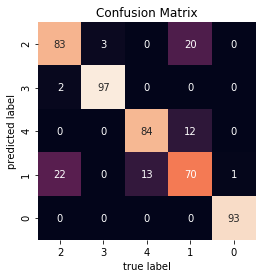

In [11]:
lucem_illud_2020.plotConfusionMatrix(clf, dfTest)

The greater the area under the curve the better.

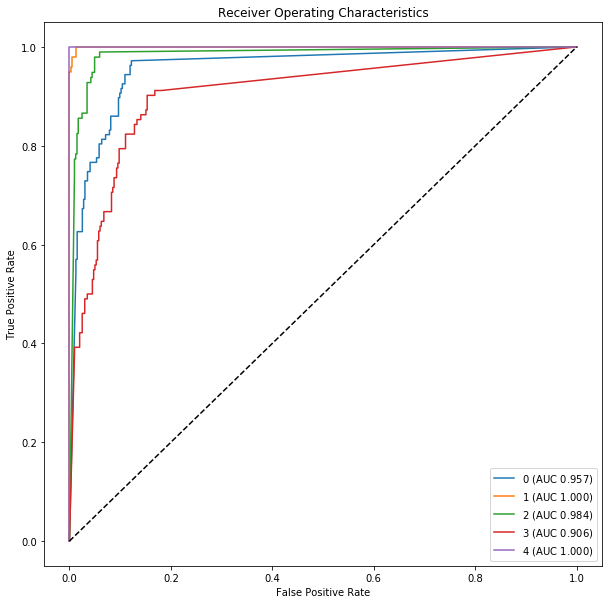

In [12]:
lucem_illud_2020.plotMultiROC(clf, dfTest)

We can also look at the regions the classifer identifies as one class or the other:

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

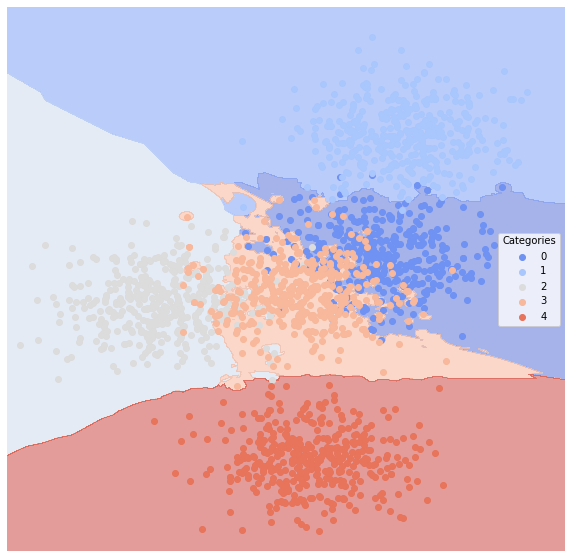

In [13]:
lucem_illud_2020.plotregions(clf, dfTrain)

## Now we do the same for real data

Available data sets include:
+ Reddit threads "classified" by thread topic
+ 20 newsgroups "classified" by group topic
+ Senate press releases "classified" by Senator (2 senators)
+ Senate press releases "classified" by Senator (5 senators)
+ Emails classified as Spam or Ham

In [14]:
import sklearn.feature_extraction

In [15]:
dfTrain, dfTest = lucem_illud_2020.trainTestSplit(lucem_illud_2020.loadReddit())
#dfTrain, dfTest = lucem_illud_2020.trainTestSplit(lucem_illud_2020.loadNewsGroups())
#dfTrain, dfTest = lucem_illud_2020.trainTestSplit(lucem_illud_2020.loadSenateSmall())
#dfTrain, dfTest = lucem_illud_2020.trainTestSplit(lucem_illud_2020.loadSenateLarge())
#dfTrain, dfTest = lucem_illud_2020.trainTestSplit(lucem_illud_2020.loadSpam())

Loading Reddit data
Converting to vectors


In [16]:
#Bayes
clf = sklearn.naive_bayes.GaussianNB()

#Analogizes
#clf = sklearn.svm.SVC(kernel = 'linear', probability = True) #slow, set probability = False to speed up, but lose ROC
#clf = sklearn.svm.SVC(kernel = 'poly', degree = 3, probability = True) #slower
#clf = sklearn.neighbors.KNeighborsClassifier(5, weights='distance')# k, 'distance' or 'uniform'

#Classical Regression
#clf = sklearn.linear_model.LogisticRegression()

#Symbolists
#clf = sklearn.tree.DecisionTreeClassifier()
#clf = sklearn.ensemble.RandomForestClassifier()

#Connectionists
#clf = sklearn.neural_network.MLPClassifier()

#Ensemble
#clf = sklearn.ensemble.GradientBoostingClassifier()

In [17]:
clf.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])

GaussianNB(priors=None, var_smoothing=1e-09)

In [18]:
lucem_illud_2020.evaluateClassifier(clf, dfTest)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
Bad Roommates,0.153605,0.770827,0.735294,0.551064,0.617284
Weeaboo Tales,0.219436,0.832381,0.542254,0.524863,0.939024
Tales From Tech Support,0.078370,0.857668,0.900000,0.725315,0.739726
Relationships,0.219436,0.648611,0.632653,0.399302,0.373494


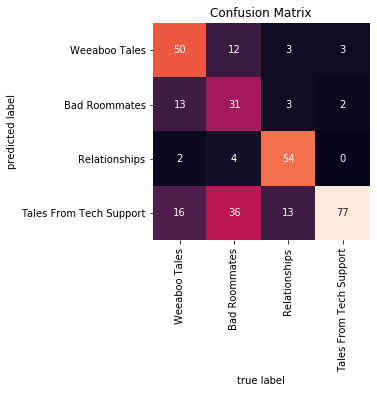

In [19]:
lucem_illud_2020.plotConfusionMatrix(clf, dfTest)

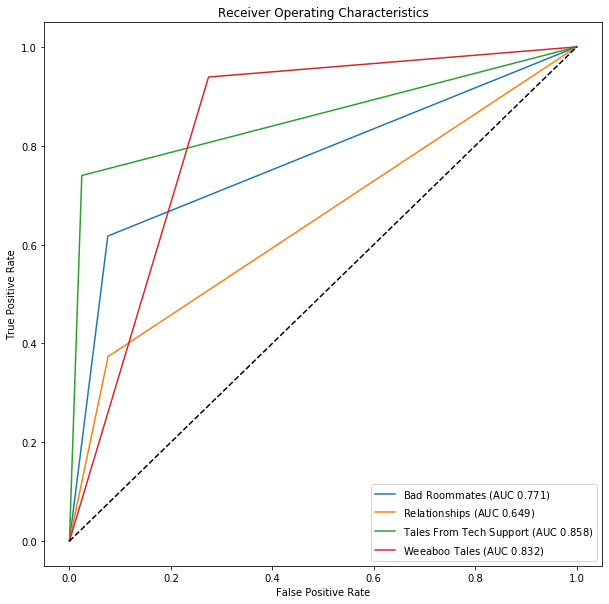

In [20]:
lucem_illud_2020.plotMultiROC(clf, dfTest)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

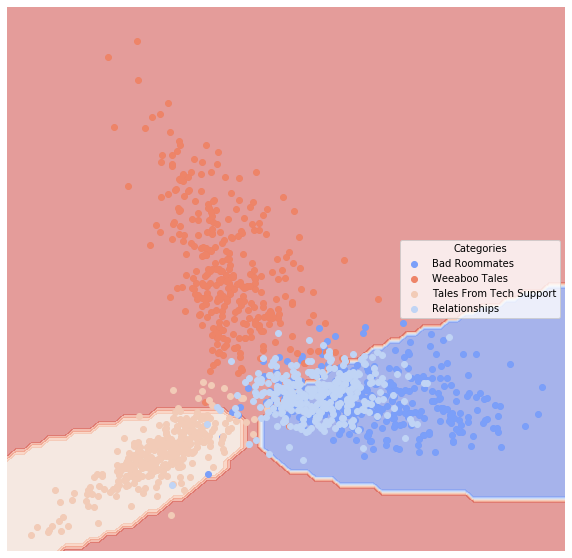

In [21]:
lucem_illud_2020.plotregions(clf, dfTrain)

## <span style="color:red">*Exercise 1*</span>

<span style="color:red">Go back through all of the cells above and generate 10 distinct artificial datasets and classify them with all of the available methods. Add a cell immediately below and describe which classifier(s) worked best with which artificially constructed data source and why. Then go through all of the empirical datasets (i.e., Newsgroups, Senate Small, Senate Large, Email Spam) and classify them with all available methods. Add a second cell immediately below and describe which classifier(s) worked best with which data set and why.

<span style="color:red">***Stretch*** (but also required) Wander through the SKLearn documentation available [here](http://scikit-learn.org/stable/), particularly perusing the classifiers. In cells following, identify and implement a new classifier that we have not yet used (e.g., AdaBoost, CART) on one artificial dataset and one real dataset (used above). Then, in the next cell describe the classifier, detail how it compares with the approaches above, and why it performed better or worse than others.

### 1. Analysis on 10 artificial datasets

In [22]:
# generate 10 distinct artificial datasets

# as there are 5 generating methods, set the noise to two values as 0.3 and 0.7

noise = [0.3, 0.7]

# set the dict for the generator object

gen_dict={'random':lucem_illud_2020.random,
          'andsplit':lucem_illud_2020.andSplit,
          'xorsplit':lucem_illud_2020.xorSplit,
          'targetsplit':lucem_illud_2020.targetSplit,
          'multiblobs':lucem_illud_2020.multiBlobs}

gen_name=['random','andsplit','xorsplit','targetsplit','multiblobs']

# set the list to store 10 datasets

data=[]

# gen the dataset

for name in gen_name:
    
    # run the random method twice as it does not depend on noise
    
    if name=='random':
        dfTrain, dfTest = lucem_illud_2020.trainTestSplit(gen_dict[name]())
        data.append(('random1','',dfTrain,dfTest))
        dfTrain, dfTest = lucem_illud_2020.trainTestSplit(gen_dict[name]())
        data.append(('random2','',dfTrain,dfTest))
        
    else:
        for i in noise:
            dfTrain, dfTest = lucem_illud_2020.trainTestSplit(gen_dict[name](i))
            data.append((name,i,dfTrain,dfTest))

In [23]:
len(data)

10

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


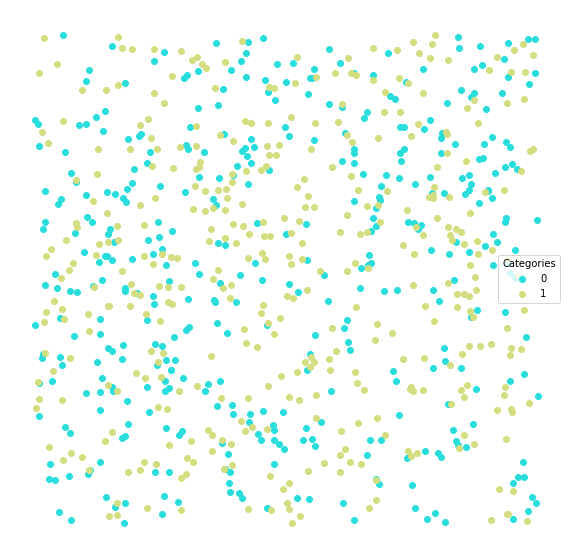

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


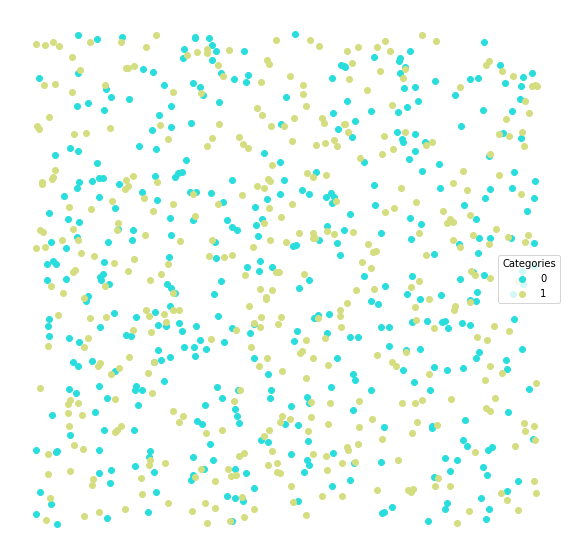

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


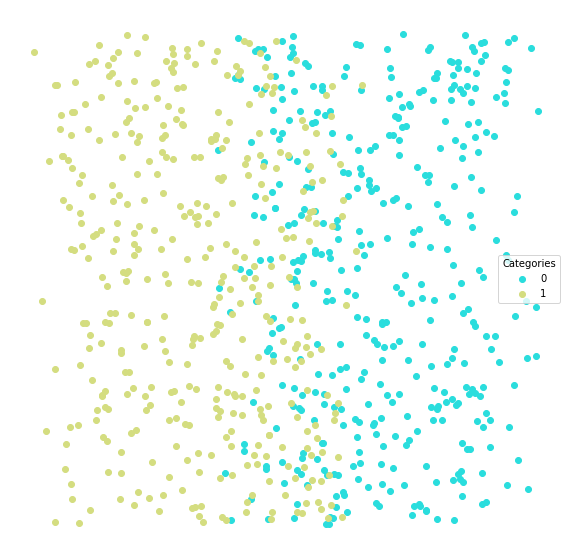

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


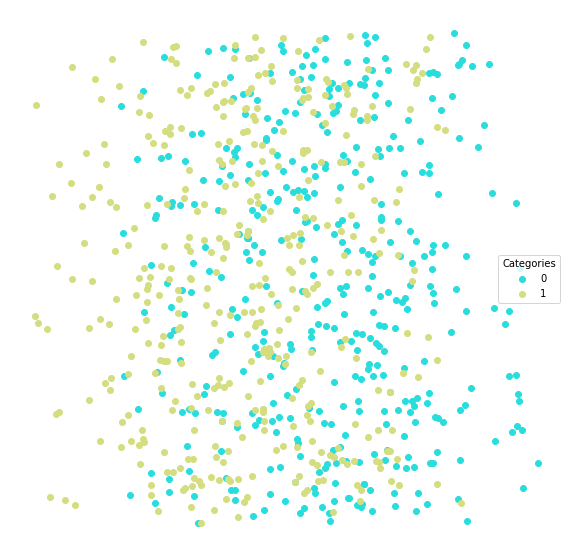

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


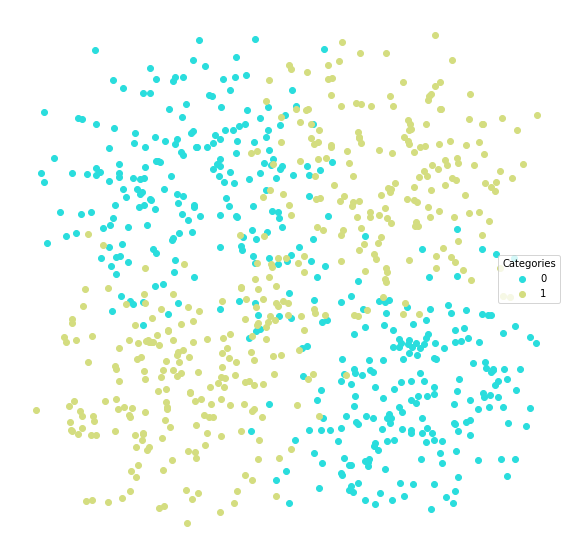

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


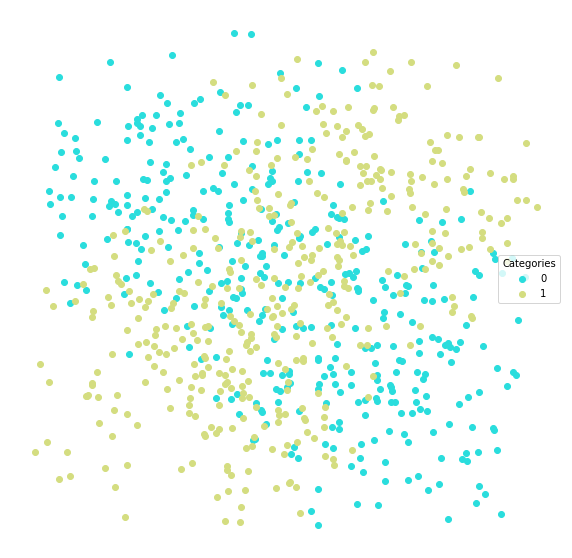

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


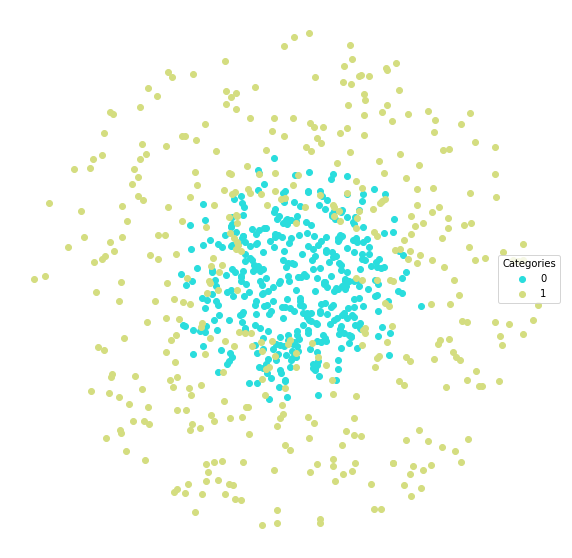

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


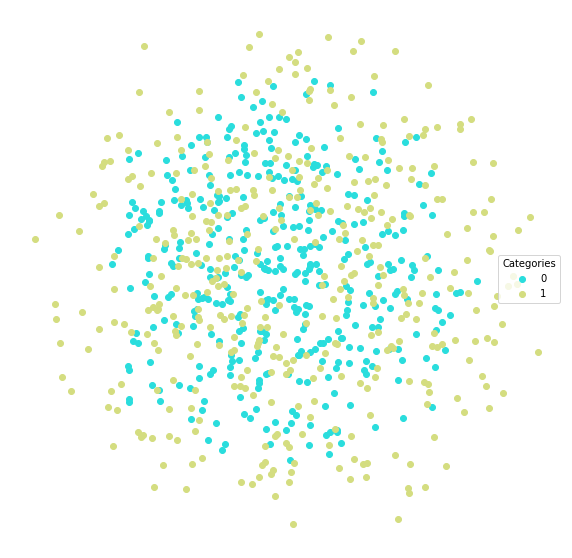

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

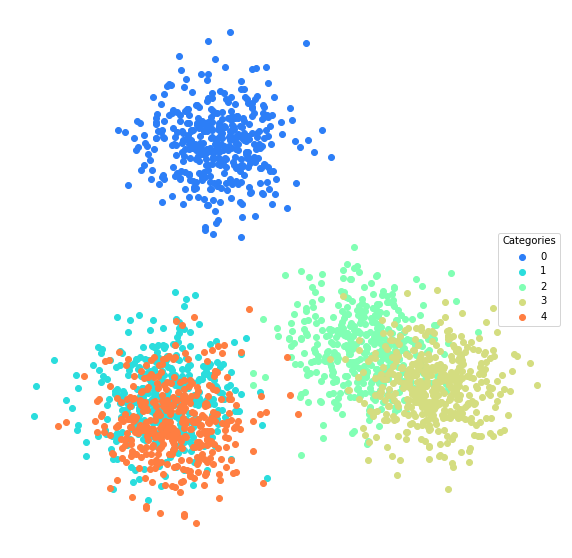

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

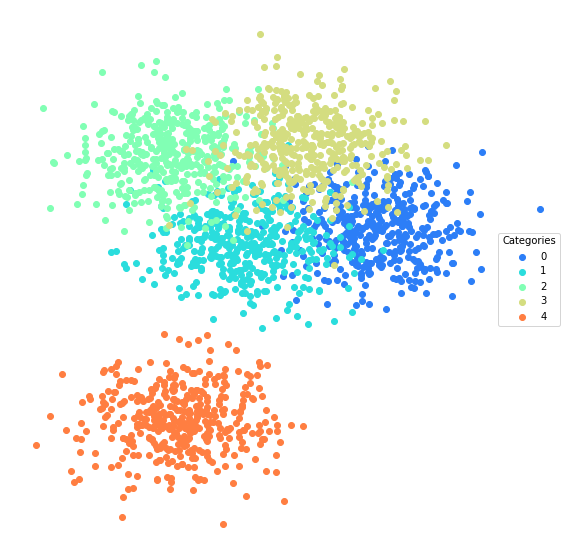

In [24]:
# plot the 10 datasets

for element in data:
    lucem_illud_2020.plotter(element[2])

In [25]:
# gen the dict for the classificaton method

method_dict={'bayes':sklearn.naive_bayes.GaussianNB(),
             'svc_linear':sklearn.svm.SVC(kernel = 'linear', probability = True),
             'svc_poly':sklearn.svm.SVC(kernel = 'poly', degree = 3, probability = False),
             'k_neighbor':sklearn.neighbors.KNeighborsClassifier(5, weights='distance'),
             'logitstic':sklearn.linear_model.LogisticRegression(),
             'decision_tree':sklearn.tree.DecisionTreeClassifier(),
             'random_forest':sklearn.ensemble.RandomForestClassifier(),
             'neural_network':sklearn.neural_network.MLPClassifier(),
             'gradient_boosting':sklearn.ensemble.GradientBoostingClassifier()}


for dataset in data:
    for method in method_dict.keys():
        print ('data generating method: {}'.format(dataset[0]))
        print ('classification method: {}'.format(method))
        print ('noise: {}'.format(dataset[1]),'\n')
        
        method_dict[method].fit(np.stack(dataset[2]['vect'], axis=0), dataset[2]['category'])
        print(lucem_illud_2020.evaluateClassifier(method_dict[method], dataset[3]),'\n')
        
    print('---------------------------------------\n')
        

data generating method: random1
classification method: bayes
noise:  

          Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
0               0.48  0.520468   0.504854           0.495644  0.536082
1               0.48  0.520468   0.536082           0.525644  0.504854 

data generating method: random1
classification method: svc_linear
noise:  

          Error_Rate      AUC  Precision  Average_Precision    Recall
Category                                                             
0               0.49  0.51136   0.495413           0.490797  0.556701
1               0.49  0.51136   0.527473           0.520812  0.466019 

data generating method: random1
classification method: svc_poly
noise:  

          Error_Rate      AUC  Precision  Average_Precision    Recall
Category                                                             
0              0.445  0.55565   0.538462           0.515864  0.577320
1

          Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
0              0.115  0.884938   0.887755           0.840148  0.878788
1              0.115  0.884938   0.882353           0.841255  0.891089 

data generating method: andsplit
classification method: neural_network
noise: 0.3 

          Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
0               0.09  0.909791   0.926316           0.878392  0.888889
1               0.09  0.909791   0.895238           0.868192  0.930693 

data generating method: andsplit
classification method: gradient_boosting
noise: 0.3 

          Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
0               0.09  0.910191   0.893204           0.865048  0.929293
1               0.09  0.910191   0.927835   

          Error_Rate      AUC  Precision  Average_Precision    Recall
Category                                                             
0               0.63  0.40101   0.277778           0.525253  0.090909
1               0.63  0.40101   0.390244           0.407507  0.711111 

data generating method: xorsplit
classification method: decision_tree
noise: 0.7 

          Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
0              0.335  0.664141   0.704762           0.654113  0.672727
1              0.335  0.664141   0.621053           0.562135  0.655556 

data generating method: xorsplit
classification method: random_forest
noise: 0.7 

          Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
0              0.305  0.692424   0.724771           0.675517  0.718182
1              0.305  0.692424   0.659341           0

          Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
0              0.000  1.000000   1.000000           1.000000  1.000000
1              0.144  0.793905   0.592593           0.468238  0.695652
2              0.040  0.937102   0.881720           0.812517  0.901099
3              0.040  0.927913   0.897727           0.810005  0.877778
4              0.144  0.778381   0.728155           0.546921  0.630252 

data generating method: multiblobs
classification method: svc_poly
noise: 0.3 

          Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
0              0.000  1.000000   1.000000           1.000000  1.000000
1              0.166  0.809889   0.533835           0.453981  0.771739
2              0.040  0.941374   0.873684           0.812877  0.912088
3              0.040  0.923577   0.906977           0.810047  0.86

          Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
0              0.044  0.934839   0.911504           0.840391  0.895652
1              0.034  0.944131   0.917526           0.851263  0.908163
2              0.032  0.962710   0.875000           0.843227  0.954545
3              0.050  0.907897   0.887640           0.775996  0.840426
4              0.000  1.000000   1.000000           1.000000  1.000000 

data generating method: multiblobs
classification method: gradient_boosting
noise: 0.7 

          Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
0              0.050  0.924845   0.901786           0.820003  0.878261
1              0.048  0.923850   0.877551           0.794096  0.877551
2              0.036  0.951346   0.872340           0.824863  0.931818
3              0.058  0.898884   0.857143           0.743

### Inference/Comment

Following the order of data generating method, and based on error rate and precision, for each dataset categorized by different data generating methods:
    
1. Dataset by `random`: It is hard to find a best algorithm for the two artificial datasets made by `random`, as most of precision rates and error rates are around 0.5. When we consider the two datasets by `random` in general, we  say that the performances of algorithms on the datasets generated by `random` have no significant differences between each other. There is no dominent-best or dominent-worst algorithm for two datasets.
    
2. Dataset by `andsplit`: It is interesting to see that all the classification methods perform better when the noise is low (0.3) with the precision around 0.9, than the situation that noise is high (0.7) with the precision around 0.6. The `bayes`, `svc_linear` and `svc_poly` are three top performing classifier regardless of noise level, and among them the difference is quite slight.

3. Dataset by `xorsplit`: When the noise is low, `neural network`, and `gradient_boosting` have very high precision around 0.9, but when the noise is high, only `svc_poly` keeps the high precision. 

4. Dataset by `targetsplit`: When the noise is low, `bayes`, `neural network`, and `gradient_boosting` have very high precision around 0.85, but when the noise is high, `random forest` and `k neighbour` have the relatively high precision. 

5. Dataset by `multiblobs`: When the noise is low, `bayes`, `svc_poly`, and `neural network` have relatively high precision, but when the noise is high, `neural network`, and `svc_linear` have relatively high precision.

In general, there is no clear preference of methods for the datasets from `random`, which makes sense as it is not depended on the noise level, and some classification methods are quite useful for datasets with certain patterns, but the datasets from `random` are just random. Regard the noise level, the number of classification methods with good performance when noise is low is more than the number when the noise is high. It makes sense, as intuitively, the higher noise, the more difficult to classify well. Also, when the noise is high, patterns are less clear, which makes it harder to identify and classify.

For the datasets with low noise level, `bayes` tends to have good performance. The reason may be due to that, as in the doc of `sklearn`, "each distribution can be independently estimated as a one dimensional distribution". For the dataset from `multiblobs`, `neural network` tends to have good performance, which may be due to that it is a multiclass classifier.

### 2. Analysis on empirical dataset

In [26]:
# generate the empirical datasets

data_emp=[]

empirical_dict={'reddit':lucem_illud_2020.loadReddit(),
                'news_grp':lucem_illud_2020.loadNewsGroups(),
                'senate_small':lucem_illud_2020.loadSenateSmall(),
                'senate_large':lucem_illud_2020.loadSenateLarge(),
                'spam':lucem_illud_2020.loadSpam()}


for name in empirical_dict.keys():
    dfTrain, dfTest = lucem_illud_2020.trainTestSplit(empirical_dict[name])
    data_emp.append((name,dfTrain,dfTest))

Loading Reddit data
Converting to vectors
Loading data for: comp.sys.mac.hardware
Loading data for: comp.windows.x
Loading data for: misc.forsale
Loading data for: rec.autos
Converting to vectors
Loading senate data
Converting to vectors
Loading senator: Klobuchar
Loading senator: Kyl
Loading senator: Kerry
Loading senator: Kohl
Loading senator: Kennedy
Converting to vectors
Loading Spam
Loading Ham
Converting to vectors


In [27]:
# apply the classification

for dataset in data_emp:
    for method in method_dict.keys():
        print ('data/corpus source: {}'.format(dataset[0]))
        print ('classification method: {}'.format(method))
        method_dict[method].fit(np.stack(dataset[1]['vect'], axis=0), dataset[1]['category'])
        print(lucem_illud_2020.evaluateClassifier(method_dict[method], dataset[2]),'\n')
    print('---------------------------------------\n')
        

data/corpus source: reddit
classification method: bayes
                         Error_Rate       AUC  Precision  Average_Precision  \
Category                                                                      
Tales From Tech Support    0.065831  0.885382   0.940299           0.793777   
Bad Roommates              0.194357  0.725957   0.735294           0.529045   
Weeaboo Tales              0.194357  0.840779   0.556452           0.527143   
Relationships              0.172414  0.722116   0.616667           0.430990   

                           Recall  
Category                           
Tales From Tech Support  0.787500  
Bad Roommates            0.531915  
Weeaboo Tales            0.907895  
Relationships            0.536232   

data/corpus source: reddit
classification method: svc_linear
                         Error_Rate       AUC  Precision  Average_Precision  \
Category                                                                      
Tales From Tech Support    0.028

                       Error_Rate       AUC  Precision  Average_Precision  \
Category                                                                    
comp.windows.x           0.089362  0.830530   0.987805           0.743072   
comp.sys.mac.hardware    0.106383  0.817741   0.910112           0.688704   
rec.autos                0.202128  0.858586   0.537688           0.529407   
misc.forsale             0.087234  0.859951   0.870000           0.717748   

                         Recall  
Category                         
comp.windows.x         0.663934  
comp.sys.mac.hardware  0.658537  
rec.autos              0.972727  
misc.forsale           0.756522   

data/corpus source: news_grp
classification method: k_neighbor
                       Error_Rate       AUC  Precision  Average_Precision  \
Category                                                                    
comp.windows.x           0.231915  0.553279   1.000000           0.338472   
comp.sys.mac.hardware    0.427660  0.

           Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                               
Klobuchar    0.050000  0.775628   0.916667           0.555420  0.556962
Kennedy      0.250000  0.777697   0.634096           0.621270  0.941358
Kerry        0.152564  0.772072   0.769697           0.573805  0.610577
Kyl          0.073077  0.732721   0.884615           0.484893  0.474227
Kohl         0.058974  0.705508   0.882353           0.421493  0.416667 

data/corpus source: senate_large
classification method: svc_linear
           Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                               
Klobuchar    0.001282  0.993671   1.000000           0.988624  0.987342
Kennedy      0.026923  0.974740   0.952239           0.943954  0.984568
Kerry        0.019231  0.971591   0.975369           0.941297  0.951923
Kyl          0.005128  0.979381   1.000000           0.963891  0.95

### Inference/Comment

Following the order of corpus, and based on error rate and precision, for each corpus:
    
1. `raddit`: The best classifiers are `svc_linear` and `logistic` with precision around 0.98, while `bayes` has the worst performance among all.
    
2. `news_group`: The best classifiers are `svc_linear`, `logistic` and `neural network` with precision around 0.85. The performances of `k_neighbour`, `svc_poly` and `bayes` are not stable, with some categories quite accruate but some others not.

3. `senate_small`: Almost all the classification methods have the precision above 0.9 even approaching one, except `bayes`, `svc_poly` and `k_neighbor`.

4. `senate_large`: The best classifiers are `svc_linear`, `decision tree`,`random forest` and `gradient boosting`, with precision almost one. `bayes` and `k neighbor` may have the worst performances among all.

5. `spam`: The good classifiers are `svc_linear`, `svc_poly`, `logistic` and `gradient boosting` with precision around 0.90. The performances of `bayes` is quite not stable, with the precision of the category of "spam" quite low but "not spam" quite high.

In general, for the classification of empirical corpora, the method of `svc_linear` is with doubt the best one, performing well in all the five corpus. The reason may be that `svc_linear` has no strict requirement on the patterns of dateset (some methods only fit well for data with certain patterns), so it could get used to all five corpora here with quite stable performance. Also, we see that some methods perform unstably among the categories in certain corpus, which may be due to that certain categories may have some patterns that match certain methods, but other categories are not, or there are some overfitting problems. 

### 3. New classifier used (AdaBoost)

A simple introduction (quoted from documentation): An AdaBoost classifier is a meta-estimator that begins by fitting a classifier on the original dataset and then fits additional copies of the classifier on the same dataset but where the weights of incorrectly classified instances are adjusted such that subsequent classifiers focus more on difficult cases.

In [28]:
# set the classifier

clf_ada = sklearn.ensemble.AdaBoostClassifier()

# For the artificial dataset, I use the dataset generated by "xorSplit" with noise of 0.7
# it is the fourth element in the list "data" I generated before

dfTrain_ada,dfTest_ada=data[5][2],data[5][3]

In [29]:
# check whether choose the right element

print(data[5][0],data[5][1])

xorsplit 0.7


In [30]:
# apply the adaboost

clf_ada.fit(np.stack(dfTrain_ada['vect'], axis=0), dfTrain_ada['category'])

print(lucem_illud_2020.evaluateClassifier(clf_ada, dfTest_ada))

          Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
0               0.54  0.469697     0.5125           0.536023  0.372727
1               0.54  0.469697     0.4250           0.435833  0.566667


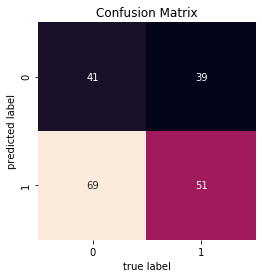

In [31]:
# confusion matrix

lucem_illud_2020.plotConfusionMatrix(clf_ada, dfTest_ada)

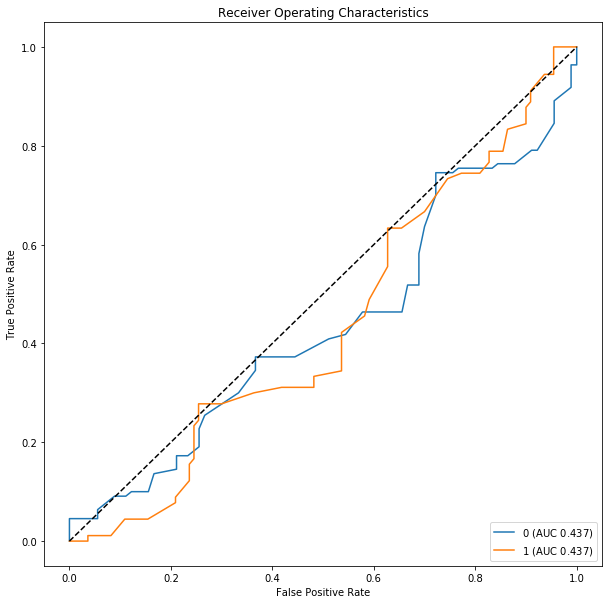

In [32]:
# plot ROC

lucem_illud_2020.plotMultiROC(clf_ada, dfTest_ada)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


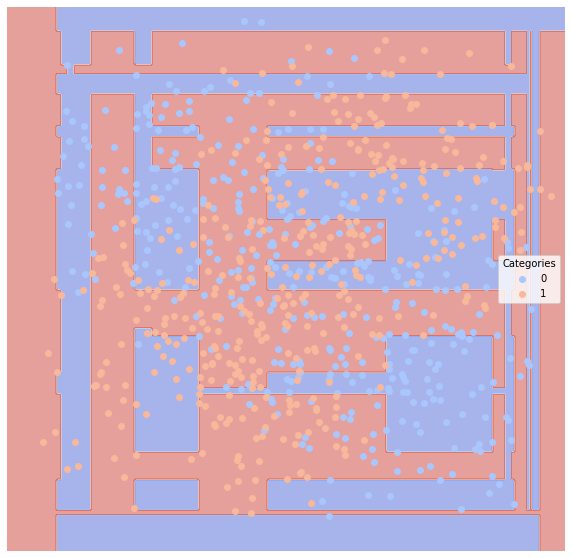

In [33]:
# plot the regions

lucem_illud_2020.plotregions(clf_ada, dfTrain_ada)

In [34]:
# For the empirical dataset, I use the corpus of spam
# it is the fourth element in the list "data_emp" I generated before

dfTrain_ada_emp,dfTest_ada_emp=data_emp[4][1],data_emp[4][2]

In [35]:
# check whether choose the right element

print(data_emp[4][0])

spam


In [36]:
# apply the adaboost

clf_ada.fit(np.stack(dfTrain_ada_emp['vect'], axis=0), dfTrain_ada_emp['category'])

print(lucem_illud_2020.evaluateClassifier(clf_ada, dfTest_ada_emp))

          Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
not spam    0.111111  0.670793   0.909667           0.908299  0.967960
spam        0.111111  0.670793   0.641509           0.323018  0.373626


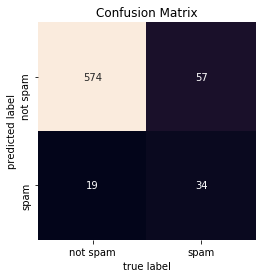

In [37]:
# confusion matrix

lucem_illud_2020.plotConfusionMatrix(clf_ada, dfTest_ada_emp)


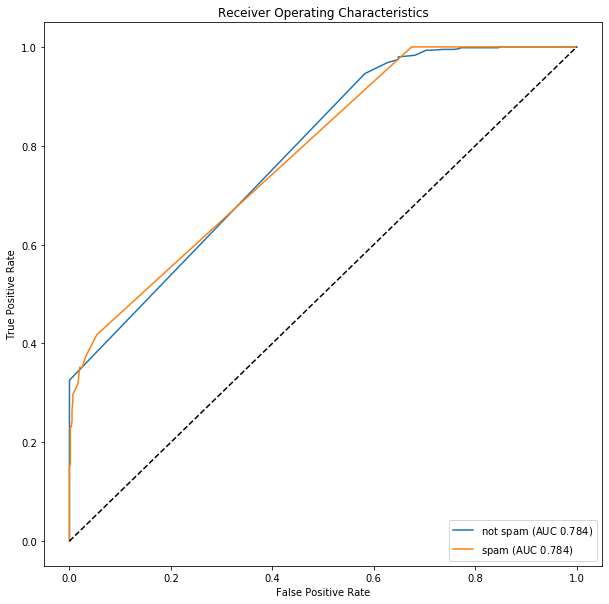

In [38]:
# plot ROC

lucem_illud_2020.plotMultiROC(clf_ada, dfTest_ada_emp)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


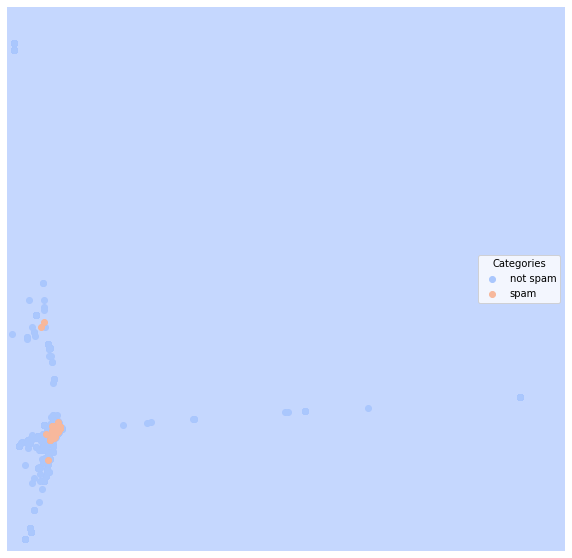

In [39]:
# plot the regions

lucem_illud_2020.plotregions(clf_ada, dfTrain_ada_emp)

### Inference/Comment

For the artificial dataset: The results and charts shown above all indicate that AdaBoost is not performing well. Specifically, if we compare the precision and error rate with previous method on the same dataset (xorsplit, 0.7), AdaBoost is among several worst performances. 

For the empirical dataset: The results and charts shown above indicate that AdaBoost is performing quite well in the empirical dataset (spam). Specifically, if we compare the precision and error rate with previous method on the same dataset, AdaBoost performs quite good, though not the best. 

The reason for the different performance on the two dataset may be that, as from EDUCBA (https://www.educba.com/adaboost-algorithm/), "It (AdaBoost) is from empirical evidence and particularly vulnerable to uniform noise." Therefore, it makes sense that when the noise level is 0.7 which is quite high, AdaBoost performs badly. Also, it may also explain why it performs well in empirical dataset.

# Clinton / Obama Press Releases

We often will not have nicely prepared data, so we will work though the proccess of cleaning and structuring in more detail here:

While the Clinton and Obama Senatorial Press Releases are not hand-coded, we can imagine that we have been given a stack of such press releases, but lost the metadata associated with which senatorial office issued which. If we label a few of them, how well can our classifier do at recovering the rest? 

In [40]:
ObamaClintonReleases = pandas.read_csv('../data/ObamaClintonReleases.csv', index_col=0)

I'm pretty sure that you're all familiar with pandas, but, just to clarify: why do we use pandas here? pandas is a Python library which is widely used for analyzing and wrangling data. In particular, pandas loads data and creates data frame, a Python object that looks familiar to us (since it looks like a excel table) and easy to work with. So, using pandas.read_csv function, we take in the csv file and convert it into a data frame. 

In [41]:
type(ObamaClintonReleases)

pandas.core.frame.DataFrame

It's a DataFrame! and it looks like this:

In [42]:
ObamaClintonReleases

,download_url,html_url,name,path,text,targetSenator
0,https://raw.githubusercontent.com/lintool/Grim...,https://github.com/lintool/GrimmerSenatePressR...,10Apr2007Obama430.txt,raw/Obama/10Apr2007Obama430.txt,Obama Calls on IRS to Protect Taxpayers ...,Obama
1,https://raw.githubusercontent.com/lintool/Grim...,https://github.com/lintool/GrimmerSenatePressR...,10Apr2008Obama108.txt,raw/Obama/10Apr2008Obama108.txt,Statement from Senator Barack Obama on the ...,Obama
2,https://raw.githubusercontent.com/lintool/Grim...,https://github.com/lintool/GrimmerSenatePressR...,10Aug2005Obama674.txt,raw/Obama/10Aug2005Obama674.txt,Obama Says Bill Will Help Cut Off Supply of...,Obama
3,https://raw.githubusercontent.com/lintool/Grim...,https://github.com/lintool/GrimmerSenatePressR...,10Aug2005Obama675.txt,raw/Obama/10Aug2005Obama675.txt,Obama Durbin Say Illinois Will Receive 33 ...,Obama
4,https://raw.githubusercontent.com/lintool/Grim...,https://github.com/lintool/GrimmerSenatePressR...,10Aug2006Obama508.txt,raw/Obama/10Aug2006Obama508.txt,Obama Introduces Bill to Help Tap Power of ...,Obama
...,...,...,...,...,...,...
1704,https://raw.githubusercontent.com/lintool/Grim...,https://github.com/lintool/GrimmerSenatePressR...,1Sep2005Clinton285.txt,raw/Clinton/1Sep2005Clinton285.txt,September 1 2005 Senator Clinton Visit Infoto...,Clinton
1705,https://raw.githubusercontent.com/lintool/Grim...,https://github.com/lintool/GrimmerSenatePressR...,1Sep2005Clinton286.txt,raw/Clinton/1Sep2005Clinton286.txt,September 1 2005 Senator Clinton Announces Ex...,Clinton
1706,https://raw.githubusercontent.com/lintool/Grim...,https://github.com/lintool/GrimmerSenatePressR...,1Sep2005Clinton287.txt,raw/Clinton/1Sep2005Clinton287.txt,September 1 2005 Senator Clinton Joins Local ...,Clinton
1707,https://raw.githubusercontent.com/lintool/Grim...,https://github.com/lintool/GrimmerSenatePressR...,1Sep2006Clinton207.txt,raw/Clinton/1Sep2006Clinton207.txt,September 1 2006 Clintons Meet with Cazenovia...,Clinton


Neat! Let's turn the 'targetSenator' column into a binary category variable.

In [43]:
ObamaClintonReleases['category'] = [s == 'Obama' for s in ObamaClintonReleases['targetSenator']]

Tokenize and normalize

In [44]:
ObamaClintonReleases['tokenized_text'] = ObamaClintonReleases['text'].apply(lambda x: lucem_illud_2020.word_tokenize(x))
ObamaClintonReleases['normalized_text'] = ObamaClintonReleases['tokenized_text'].apply(lambda x: lucem_illud_2020.normalizeTokens(x))

Let's split the data into training data and testing data.

In [45]:
holdBackFraction = .2
train_data_df, test_data_df = lucem_illud_2020.trainTestSplit(ObamaClintonReleases, holdBackFraction=holdBackFraction)

In [46]:
print(len(train_data_df))
print(len(test_data_df))

1368
341


## Logistic Regression

First, let's try with a logistic regression, which may be familiar to you from statistical methods classes. First, we must turn the training dataset into a tf-idf matrix (`lucem_illud_2020.generateVecs()` will help with this but for now we are doing it the long way):

In [47]:
TFVectorizer = sklearn.feature_extraction.text.TfidfVectorizer(max_df=100, min_df=2, stop_words='english', norm='l2')
TFVects = TFVectorizer.fit_transform(train_data_df['text'])

The core function here is TfidfVectorizer, which takes a collection of raw documents and turn them to a tf-idf matrix. Just to recap: tf-idf means term frequency-inverse document frequency, a statistic (or, more precisely, a product of two statistics, term frequency and inverse document frequency) that shows the importance of a term vis-a-vis documents. TF, or, term frequency, counts how many times a term is used in a document; IDF, or, inverse-document-frequency, measures common or rare a term appears across documents. 

Let's look at three parameters of TfidfVectorizer: max_df = 100, min_df = 2, and norm='l2'. What do those parameters mean? 

(1) max_df = 100

Here, we specified a thredhold of 100, and the terms that have a document frequency higher than 100 would be ignored.

(2) min_df = 2

We specified a lower bound, 2, and the terms that have a document frequency lower than 2 will be ignored.

(3) norm = 'l2'

This parameter is about vector normalization. In machine learning, we commonly normalize vectors, i.e., change the length of vectors and turn them into a unit vector, before passing them into algorithms. There are various ways of normalizations, and this parameter specifies how we normalize vectors. Here, we set the norm to l2, in which case, we normalize the vectors such that squares of vector elements sums to 1. Alternatively, we can set it to l1, in which case the sum of absolute values of vector elements, not the square of vector elements, is 1. 

fit_transform() literally fits to data and then transform it. So, fit_transform() is just a combination of two steps--(1) fitting parameters to data; (2) then, using the vocabulary and document frequencies learned by fit(), transforming documents into document-term matrix. So, it's the same as fit followed by transform. 

Note that we can use the CountVectorizer instead, which simply produces a matrix of word counts.

In [48]:
TFVects.shape

(1368, 11261)

We can save this in the dataframe to make things easier

In [49]:
train_data_df['vect'] = [np.array(v).flatten() for v in TFVects.todense()]

Looks simple, but we need to know what todense() does here. todense() returns a dense matrix representation of the matrix. Why do we need this? As you can see above, the TFVects, a document-term matrix, has 11349 columns, and this matrix is sparse, in the sense that it is comprised mostly of zeros. Dense matrices, in contrast, are the matrices that are comprised of mostly non-zeros. Then why do we make sparse matrices into dense ones? Because zero values don't contain important information but take up so much memory.

In a regression, we cannot have more variables than cases. So, we need to first do a dimension reduction. First, we will approah this with PCA. You have previously seen this in week 3. Here we are not concerned about visualization, but rather classification and so all principal components are calculated. Watch out: we have to use `stack` not `sum` for combining the vectors. We note that you could also use topic loading and embedding dimensions as featured variables.

In [50]:
pca = sklearn.decomposition.PCA()
reduced_data = pca.fit_transform(np.stack(train_data_df['vect'], axis=0))

We can store the PCA space vectors in the dataframe too:

In [51]:
train_data_df['pca'] = [r for r in reduced_data]

Visualization in 2D:

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


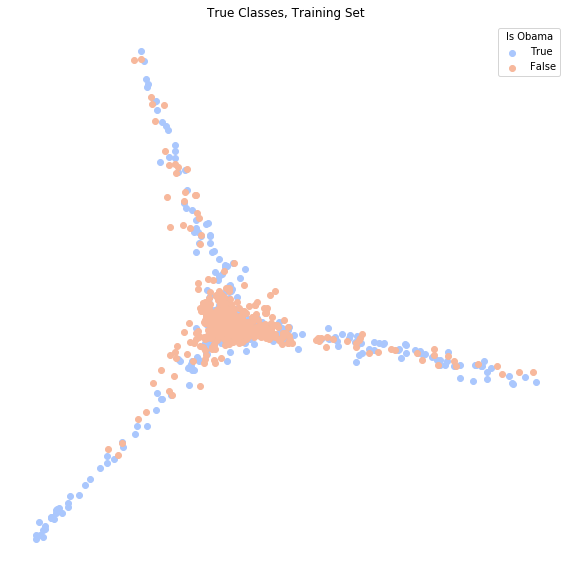

In [52]:
fig, ax = plt.subplots(figsize = (10,10))
ax.axis('off')
pallet = seaborn.color_palette(palette='coolwarm', n_colors = 2)

#Plot Obama
a = np.stack(train_data_df[train_data_df['category']]['pca'])
ax.scatter(a[:,0], a[:, 1], c = pallet[0], label = "True")

#Plot not Obama
a = np.stack(train_data_df[train_data_df['category'].eq(False)]['pca'])
ax.scatter(a[:,0], a[:, 1], c = pallet[1], label = "False")
    
ax.legend(loc = 'upper right', title = 'Is Obama')
plt.title('True Classes, Training Set')
plt.show()

PCA cannot distinguish Obama very well. Let's perform a screeplot to see how many Principal Components we need.

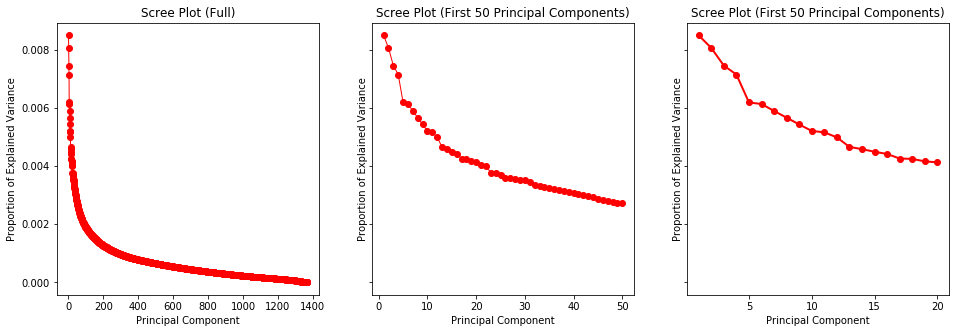

In [53]:
n = len(train_data_df)

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize = (16, 5), sharey=True)

eigen_vals = np.arange(n) + 1
ax1.plot(eigen_vals, pca.explained_variance_ratio_, 'ro-', linewidth=1)
ax1.set_title('Scree Plot (Full)')
ax1.set_xlabel('Principal Component')
ax1.set_ylabel('Proportion of Explained Variance')

eigen_vals = np.arange(50) + 1
ax2.plot(eigen_vals, pca.explained_variance_ratio_[:50], 'ro-', linewidth=1)
ax2.set_title('Scree Plot (First 50 Principal Components)')
ax2.set_xlabel('Principal Component')
ax2.set_ylabel('Proportion of Explained Variance')


eigen_vals = np.arange(20) + 1
ax3.plot(eigen_vals, pca.explained_variance_ratio_[:20], 'ro-', linewidth=2)
ax3.set_title('Scree Plot (First 50 Principal Components)')
ax3.set_xlabel('Principal Component')
ax3.set_ylabel('Proportion of Explained Variance')

plt.show()

Let's choose the first 10 pricipal components as our covariates.

In [54]:
train_data_df['pca_reduced_10'] = train_data_df['pca'].apply(lambda x: x[:10])

Now we fit a logistic regression to our data.

In [55]:
logistic = sklearn.linear_model.LogisticRegression()
logistic.fit(np.stack(train_data_df['pca_reduced_10'], axis=0), train_data_df['category'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Let's see how the logistic regression performs on the training dataset from which we develop the model. Unfortunately, the mean accuracy is only about 64%.

In [56]:
logistic.score(np.stack(train_data_df['pca_reduced_10'], axis=0), train_data_df['category'])

0.6783625730994152

How does it perform on the testing dataset, which we "held out" and did not use for model training? We need to repeat all the steps on the testing data, but without retraining:

In [57]:
#Create vectors
TFVects_test = TFVectorizer.transform(test_data_df['text'])
test_data_df['vect'] = [np.array(v).flatten() for v in TFVects_test.todense()]

#PCA
reduced_data_test = pca.transform(np.stack(test_data_df['vect'], axis=0))
test_data_df['pca'] = [r for r in reduced_data_test]
test_data_df['pca_reduced_10'] = test_data_df['pca'].apply(lambda x: x[:10])

#Test
logistic.score(np.stack(test_data_df['pca_reduced_10'], axis=0), test_data_df['category'])

0.6304985337243402

Slightly poorer. How about using more dimensions (40)?

In [58]:
train_data_df['pca_reduced_40'] = train_data_df['pca'].apply(lambda x: x[:40])
test_data_df['pca_reduced_40'] = test_data_df['pca'].apply(lambda x: x[:40])

logistic.fit(np.stack(train_data_df['pca_reduced_40'], axis=0), train_data_df['category'])

print("Training:")
print(logistic.score(np.stack(train_data_df['pca_reduced_40'], axis=0), train_data_df['category']))
print("Testing:")
print(logistic.score(np.stack(test_data_df['pca_reduced_40'], axis=0), test_data_df['category']))

Training:
0.743421052631579
Testing:
0.6715542521994134


Or still more (100)?

In [59]:
train_data_df['pca_reduced_100'] = train_data_df['pca'].apply(lambda x: x[:100])
test_data_df['pca_reduced_100'] = test_data_df['pca'].apply(lambda x: x[:100])

logistic.fit(np.stack(train_data_df['pca_reduced_100'], axis=0), train_data_df['category'])

print("Training:")
print(logistic.score(np.stack(train_data_df['pca_reduced_100'], axis=0), train_data_df['category']))
print("Testing:")
print(logistic.score(np.stack(test_data_df['pca_reduced_100'], axis=0), test_data_df['category']))

Training:
0.8194444444444444
Testing:
0.7360703812316716


Or even more (200)!

In [60]:
train_data_df['pca_reduced_200'] = train_data_df['pca'].apply(lambda x: x[:200])
test_data_df['pca_reduced_200'] = test_data_df['pca'].apply(lambda x: x[:200])

logistic.fit(np.stack(train_data_df['pca_reduced_200'], axis=0), train_data_df['category'])

print("Training:")
print(logistic.score(np.stack(train_data_df['pca_reduced_200'], axis=0), train_data_df['category']))
print("Testing:")
print(logistic.score(np.stack(test_data_df['pca_reduced_200'], axis=0), test_data_df['category']))

Training:
0.868421052631579
Testing:
0.7712609970674487


This is becoming ridiculous (400)!

In [61]:
train_data_df['pca_reduced_400'] = train_data_df['pca'].apply(lambda x: x[:400])
test_data_df['pca_reduced_400'] = test_data_df['pca'].apply(lambda x: x[:400])

logistic.fit(np.stack(train_data_df['pca_reduced_400'], axis=0), train_data_df['category'])

print("Training:")
print(logistic.score(np.stack(train_data_df['pca_reduced_400'], axis=0), train_data_df['category']))
print("Testing:")
print(logistic.score(np.stack(test_data_df['pca_reduced_400'], axis=0), test_data_df['category']))

Training:
0.9115497076023392
Testing:
0.7917888563049853


Increasing the number of covariates would overfit our data, and it seems that using a logistic regression, our prediction accuracy is at best about 65%. We can, however, try a logistic regression that uses the TF-IDF scores for each word, but with an L1 regularization or L1-norm loss function, which is also known as least absolute deviations (LAD), least absolute errors (LAE) or L1 penalty. It minimizes the sum of the absolute differences (S) between the target value ($Y_i$) and the estimated values ($f(x_i)$) and prunes all insignificant variables (i.e., word TF-IDF scores):

$S=\sum^n_{i=1}|y_i=f(x_i)|$

The result is a model retaining only the most individually significant features.

In [62]:
logistic_l1= sklearn.linear_model.LogisticRegression(penalty='l2')
logistic_l1.fit(np.stack(train_data_df['vect'], axis=0), train_data_df['category'])
print(logistic_l1.score(np.stack(train_data_df['vect'], axis=0), train_data_df['category']))

0.9634502923976608


Train the model using training data, and then test it on the testing data.

In [63]:
print(logistic_l1.score(np.stack(test_data_df['vect'], axis=0), test_data_df['category']))

0.8123167155425219


81% accuracy seems like the best we can get by using a logistic regression.

Now let's try with Naive Bayes. Classically, it is trained with word counts, but TF-IDF vectors are also quite good:

In [64]:
naiveBayes = sklearn.naive_bayes.BernoulliNB()
naiveBayes.fit(np.stack(train_data_df['vect'], axis=0), train_data_df['category'])

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [65]:
print("Training:")
print(naiveBayes.score(np.stack(train_data_df['vect'], axis=0), train_data_df['category']))
print("Testing:")
print(naiveBayes.score(np.stack(test_data_df['vect'], axis=0), test_data_df['category']))

Training:
0.9576023391812866
Testing:
0.8885630498533724


A bit better than the logit, but that's just looking at the accuracy. What about other measures? Let's first save the predictions in the dataframe to save use rerunning the model every time:

In [66]:
test_data_df['nb_predict'] = naiveBayes.predict(np.stack(test_data_df['vect'], axis=0))
test_data_df['nb_predict_prob_true'] = naiveBayes.predict_proba(np.stack(test_data_df['vect'], axis=0))[:,0] #other is prop false

Precision:

In [67]:
sklearn.metrics.precision_score(test_data_df['category'], test_data_df['nb_predict'])

0.916030534351145

Recall:

In [68]:
sklearn.metrics.recall_score(test_data_df['category'], test_data_df['nb_predict'])

0.8163265306122449

F1-measure:

In [69]:
sklearn.metrics.f1_score(test_data_df['category'], test_data_df['nb_predict'])

0.8633093525179856

Let's take a look at how well our posterior distribution looks relative to the truth.

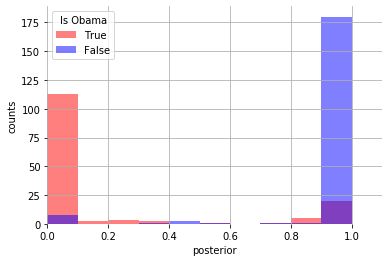

In [70]:
fig, ax = plt.subplots()
ax.grid(False)
ax.set_frame_on(False)
test_data_df[test_data_df['category'].eq(True)]['nb_predict_prob_true'].hist(alpha = 0.5, ax = ax, bins = 10, label = 'True', color = 'red')
test_data_df[test_data_df['category'].eq(False)]['nb_predict_prob_true'].hist(alpha = 0.5, ax = ax, bins = 10, label = 'False', color = 'blue')
ax.set_xlim((0,1.1))
ax.legend(title = "Is Obama")
ax.set_xlabel('posterior')
ax.set_ylabel('counts')
plt.show()

The classification is suprisingly accurate. We can even look at what words are most influential with a bit of simple math:

In [71]:
#Top indices
trueVals, falseVals = naiveBayes.feature_log_prob_

words_dict = {
    'Obama' : [],
    'Obama_log_prob' : [],
    'Clinton' : [],
    'Clinton_log_prob' : [],
}

for i, prob in sorted(enumerate(trueVals), key = lambda x:x[1], reverse=True)[:15]:
    words_dict['Obama'].append(TFVectorizer.get_feature_names()[i])
    words_dict['Obama_log_prob'].append(prob)

for i, prob in sorted(enumerate(falseVals), key = lambda x:x[1], reverse=True)[:15]:
    words_dict['Clinton'].append(TFVectorizer.get_feature_names()[i])
    words_dict['Clinton_log_prob'].append(prob)
    
pandas.DataFrame(words_dict)

,Obama,Obama_log_prob,Clinton,Clinton_log_prob
0,announcement,-2.251911,5566,-1.739934
1,ground,-2.300113,dick,-1.824195
2,welcomed,-2.300113,amy,-1.857717
3,fy,-2.337853,monday,-1.892403
4,welcome,-2.377074,brundage,-1.928335
5,urging,-2.390497,chicago,-1.928335
6,urban,-2.417896,temporary,-2.191920
7,urged,-2.417896,reform,-2.224180
8,created,-2.431882,va,-2.240710
9,honor,-2.431882,cases,-2.274611


## Multinomial Naive Bayes

What if we want to classify our text into one of *many* classes? The multinomial Naive Bayes generating model assumes that document features (e.g., words) are generated by draws from a multinomial distribution (recall this gives the probability to observe a particular pattern of counts across features). 

Let's explore this using the 20NG dataset, a scikit learn built in dataset which features 20 news categories.

In [72]:
from sklearn import datasets

In [73]:
newsgroups = sklearn.datasets.fetch_20newsgroups(data_home = '../data') #Free data to play with: documents from a newsgroup corpus.
newsgroups.target_names #Possible categories, i.e., the newsgroups

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

We can pick specific categories, and pull the relevant training and testing sets. 

In [74]:
target_categories = ['talk.religion.misc', 'soc.religion.christian', 'sci.space', 'comp.graphics'] #Can change these of course

newsgroupsDF = pandas.DataFrame(columns = ['text', 'category', 'source_file'])
for category in target_categories:
    print("Loading data for: {}".format(category))
    ng = sklearn.datasets.fetch_20newsgroups(categories = [category], remove=['headers', 'footers', 'quotes'], data_home = '../data')
    newsgroupsDF = newsgroupsDF.append(pandas.DataFrame({'text' : ng.data, 'category' : [category] * len(ng.data), 'source_file' : ng.filenames}), ignore_index=True)

Loading data for: talk.religion.misc
Loading data for: soc.religion.christian
Loading data for: sci.space
Loading data for: comp.graphics


Now we need to tokenize, and make a training and testing set:

In [75]:
newsgroupsDF['tokenized_text'] = newsgroupsDF['text'].apply(lambda x: lucem_illud_2020.word_tokenize(x))
newsgroupsDF['normalized_text'] = newsgroupsDF['tokenized_text'].apply(lambda x: lucem_illud_2020.normalizeTokens(x))

In [76]:
holdBackFraction = .2
train_ng_df, test_ng_df = lucem_illud_2020.trainTestSplit(newsgroupsDF, holdBackFraction=holdBackFraction)

In [77]:
print(len(train_ng_df))
print(len(test_ng_df))

1723
430


We need to extract features from the text. We can use built-in feature extraction to do so. We will use a tf-idf vectorizer, which converts the document into a vector of words with tf-idf weights (term-frequency inverse-document frequency). This gives high weight to words that show up a lot in a given document, but rarely across documents in the corpus (more distinctive). 

In [78]:
TFVectorizer_ng = sklearn.feature_extraction.text.TfidfVectorizer(max_df=100, min_df=2, stop_words='english', norm='l2')
TFVects_ng = TFVectorizer_ng.fit_transform(train_ng_df['text'])
train_ng_df['vect'] = [np.array(v).flatten() for v in TFVects_ng.todense()]

Now we can train the model:

In [79]:
MultinomialNB_ng = sklearn.naive_bayes.MultinomialNB()
MultinomialNB_ng.fit(np.stack(train_ng_df['vect'], axis = 0), train_ng_df['category'])

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

...and save predictions to the dataframe:

In [80]:
train_ng_df['nb_predict'] = MultinomialNB_ng.predict(np.stack(train_ng_df['vect'], axis=0))
print("Training score:")
print(MultinomialNB_ng.score(np.stack(train_ng_df['vect'], axis=0), train_ng_df['category']))

Training score:
0.9024956471271038


In [81]:
train_ng_df[['category', 'nb_predict']][:10]

,category,nb_predict
2052,comp.graphics,comp.graphics
1721,comp.graphics,comp.graphics
997,sci.space,sci.space
1277,sci.space,sci.space
229,talk.religion.misc,soc.religion.christian
111,talk.religion.misc,talk.religion.misc
413,soc.religion.christian,soc.religion.christian
726,soc.religion.christian,soc.religion.christian
1532,sci.space,sci.space
799,soc.religion.christian,soc.religion.christian


Looks pretty good, lets examine the testing dataset:

In [82]:
#Create vectors
TFVects_test = TFVectorizer_ng.transform(test_ng_df['text'])
test_ng_df['vect'] = [np.array(v).flatten() for v in TFVects_test.todense()]

#Add to df
test_ng_df['nb_predict'] = MultinomialNB_ng.predict(np.stack(test_ng_df['vect'], axis=0))

#Test
print("Testing score:")
print(MultinomialNB_ng.score(np.stack(test_ng_df['vect'], axis=0), test_ng_df['category']))

Testing score:
0.813953488372093


We can even use a confusion matrix, like we used last week for evaluating human coders relative to one another. Now we are evaluating our classifier relative to human coding. We'll just use the one in `lucem_illud_2020`, which requres a classifier and a dataframe with `'vect'` and `'category'` columns, like we have in the examples:

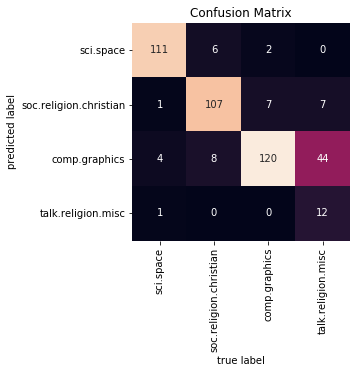

In [83]:
lucem_illud_2020.plotConfusionMatrix(MultinomialNB_ng, test_ng_df)

Let's calculate the precision, recall, and F-measures.

In [84]:
print(sklearn.metrics.precision_score(test_ng_df['category'], test_ng_df['nb_predict'], average = 'weighted')) #precision
print(sklearn.metrics.recall_score(test_ng_df['category'], test_ng_df['nb_predict'], average = 'weighted')) #recall

0.8403855725804102
0.813953488372093


We can evaluate these per catagory. This has the same requiments as `plotConfusionMatrix`:

In [85]:
lucem_illud_2020.metrics.evaluateClassifier(MultinomialNB_ng, test_ng_df)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
soc.religion.christian,0.151163,0.872093,0.681818,0.655180,0.930233
sci.space,0.067442,0.917877,0.877049,0.808131,0.884298
comp.graphics,0.032558,0.961579,0.932773,0.898892,0.948718
talk.religion.misc,0.120930,0.593876,0.923077,0.294429,0.190476


We can also plot the ROC curves. This has the same requiments as `plotConfusionMatrix`:

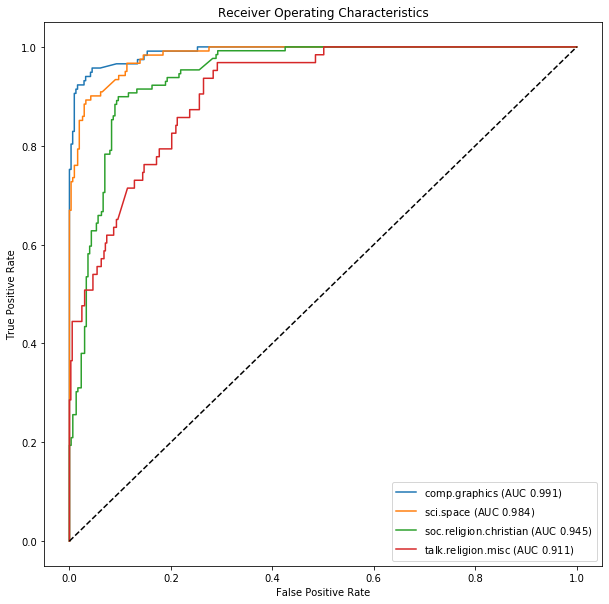

In [86]:
lucem_illud_2020.plotMultiROC(MultinomialNB_ng, test_ng_df)

And we can plot the PCA space visualization:

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

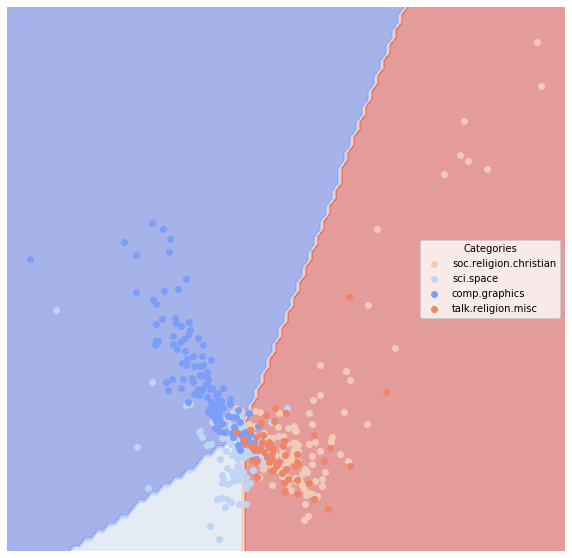

In [87]:
lucem_illud_2020.plotregions(MultinomialNB_ng, test_ng_df)

## <span style="color:red">*Exercise 2*</span>

<span style="color:red">In the cells immediately following, perform Logistic and Naïve Bayes classification (binary or multinomial) using training, testing and extrapolation (uncoded) data from texts and hand-classifications associated with your final project (e.g., these could be crowd-sourced codes gathered through Amazon Mechanical Turk last week). Visualize the confusion matrix for training and testing sets. Calculate precision, recall, the F-measure, and AUC, then perform an ROC visualization. How do these classifiers perform? Exrapolate codes from these models to all uncoded data.


As sample size of my codes in the last week is quite small, I will choose one corpus of internet argument in the online political debates, and it is coded on whether the text is revealing sarcasm or not by Amazon Mechanical turk. It is related to my project, as I could get what kind of sentences will deliver sarcastic tones in American politics and how to predict it.

This corpus is from Shereen Oraby, Vrindavan Harrison, Lena Reed, Ernesto Hernandez, Ellen Riloff and Marilyn Walker. "Creating and Characterizing a Diverse Corpus of Sarcasm in Dialogue." In The 17th Annual SIGdial Meeting on Discourse and Dialogue (SIGDIAL), Los Angeles, California, USA, 2016.

In [88]:
#Load the coded csv

df_sar = pandas.read_csv('sarcasm_v2.csv')

In [89]:
# process the corpus
# as sarcasm is coded for each "quote" and "response" text pair, merge each pair into one text cell.

df_sar['text']=df_sar['Quote Text']+df_sar['Response Text']

In [90]:
# now turn the code into a binary category

df_sar['category'] = [s == 'sarc' for s in df_sar['Label']]

In [91]:
# gen the tokens

df_sar['tokenized_text'] = df_sar['text'].apply(lambda x: lucem_illud_2020.word_tokenize(x))
df_sar['normalized_text'] = df_sar['tokenized_text'].apply(lambda x: lucem_illud_2020.normalizeTokens(x))

In [92]:
# drop the unrelevant columns to shorten the running time afterwards

df_sar.drop(['ID','Corpus','Quote Text','Response Text'],axis=1)

,Label,text,category,tokenized_text,normalized_text
0,sarc,"First off, That's grade A USDA approved Libera...",True,"[First, off, That, 's, grade, A, USDA, approve...","[grade, usda, approve, liberalism, nutshell, a..."
1,sarc,watch it. Now you're using my lines. Poet has ...,True,"[watch, it, Now, you, 're, using, my, lines, P...","[watch, line, poet, easy, target, agree, chatt..."
2,sarc,Because it will encourage teens to engage in r...,True,"[Because, it, will, encourage, teens, to, enga...","[encourage, teen, engage, risky, behavior, abs..."
3,sarc,Obviously you missed the point. So sorry the t...,True,"[Obviously, you, missed, the, point, So, sorry...","[obviously, miss, point, sorry, irony, guess, ..."
4,sarc,This is pure paranoia. What evidence do you ha...,True,"[This, is, pure, paranoia, What, evidence, do,...","[pure, paranoia, evidence, support, point, vie..."
...,...,...,...,...,...
4687,notsarc,personally i don't give rats rear end about yo...,False,"[personally, i, do, n't, give, rats, rear, end...","[personally, rat, rear, end, god, government, ..."
4688,notsarc,what did the founding fathers intend with the ...,False,"[what, did, the, founding, fathers, intend, wi...","[found, father, intend, 2, amendment, http://w..."
4689,notsarc,"Sorry, I expanded my definitions here and was ...",False,"[Sorry, I, expanded, my, definitions, here, an...","[sorry, expand, definition, polite, inform, re..."
4690,notsarc,What we are left with are gods that have consi...,False,"[What, we, are, left, with, are, gods, that, h...","[leave, god, considerably, little, interaction..."


In [93]:
# split the data

holdBackFraction = .2
train_data_df, test_data_df = lucem_illud_2020.trainTestSplit(df_sar, holdBackFraction=holdBackFraction)

In [94]:
print(len(train_data_df))
print(len(test_data_df))

3754
938


## 1.1 Apply the logistic regression - coded text

In [95]:
# tranfer into a tf-idf matrix

TFVectorizer = sklearn.feature_extraction.text.TfidfVectorizer(max_df=100, min_df=2, stop_words='english', norm='l2')
TFVects = TFVectorizer.fit_transform(train_data_df['text'])

In [96]:
TFVects.shape

(3754, 9745)

In [97]:
train_data_df['vect'] = [np.array(v).flatten() for v in TFVects.todense()]

In [98]:
# do the dimension reduction

pca = sklearn.decomposition.PCA()
reduced_data = pca.fit_transform(np.stack(train_data_df['vect'], axis=0))

In [99]:
train_data_df['pca'] = [r for r in reduced_data]

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


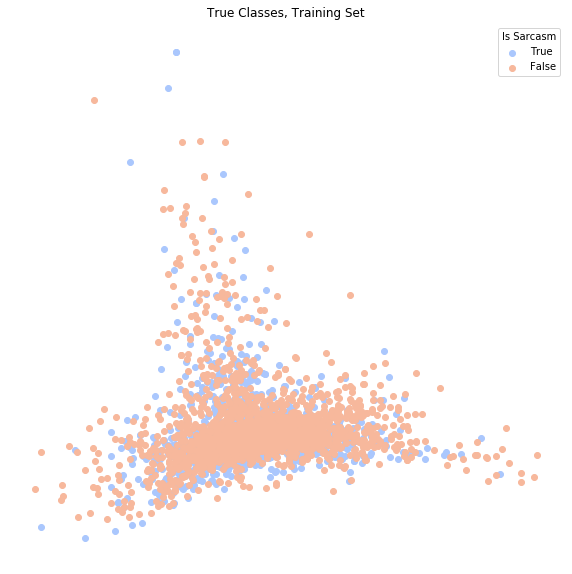

In [100]:
#visualize in 2d

fig, ax = plt.subplots(figsize = (10,10))
ax.axis('off')
pallet = seaborn.color_palette(palette='coolwarm', n_colors = 2)

#Plot Obama
a = np.stack(train_data_df[train_data_df['category']]['pca'])
ax.scatter(a[:,0], a[:, 1], c = pallet[0], label = "True")

#Plot not Obama
a = np.stack(train_data_df[train_data_df['category'].eq(False)]['pca'])
ax.scatter(a[:,0], a[:, 1], c = pallet[1], label = "False")
    
ax.legend(loc = 'upper right', title = 'Is Sarcasm')
plt.title('True Classes, Training Set')
plt.show()

### Inference/Comment

It seems that PCA identifies the sarcasm well.

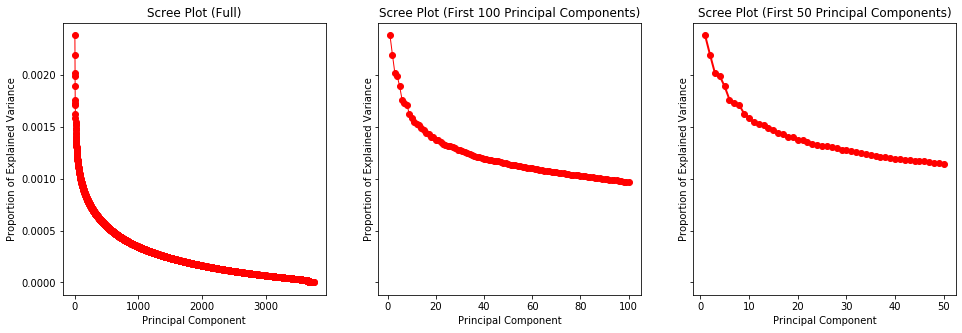

In [101]:
# screeplot to see how many Principal Components we need

n = len(train_data_df)

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize = (16, 5), sharey=True)

eigen_vals = np.arange(n) + 1
ax1.plot(eigen_vals, pca.explained_variance_ratio_, 'ro-', linewidth=1)
ax1.set_title('Scree Plot (Full)')
ax1.set_xlabel('Principal Component')
ax1.set_ylabel('Proportion of Explained Variance')

eigen_vals = np.arange(100) + 1
ax2.plot(eigen_vals, pca.explained_variance_ratio_[:100], 'ro-', linewidth=1)
ax2.set_title('Scree Plot (First 100 Principal Components)')
ax2.set_xlabel('Principal Component')
ax2.set_ylabel('Proportion of Explained Variance')


eigen_vals = np.arange(50) + 1
ax3.plot(eigen_vals, pca.explained_variance_ratio_[:50], 'ro-', linewidth=2)
ax3.set_title('Scree Plot (First 50 Principal Components)')
ax3.set_xlabel('Principal Component')
ax3.set_ylabel('Proportion of Explained Variance')

plt.show()

### Inference/Comment

From the charts, it seems that the first 10 principal components will be good, so I choose first 10 principal components as my covariates.

In [102]:
train_data_df['pca_reduced_10'] = train_data_df['pca'].apply(lambda x: x[:10])

In [103]:
# gen logistic regression

logistic = sklearn.linear_model.LogisticRegression()
logistic.fit(np.stack(train_data_df['pca_reduced_10'], axis=0), train_data_df['category'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [104]:
logistic.score(np.stack(train_data_df['pca_reduced_10'], axis=0), train_data_df['category'])

0.6291955247735749

In [105]:
# try the test data

#Create vectors
TFVects_test = TFVectorizer.transform(test_data_df['text'])
test_data_df['vect'] = [np.array(v).flatten() for v in TFVects_test.todense()]

#PCA
reduced_data_test = pca.transform(np.stack(test_data_df['vect'], axis=0))
test_data_df['pca'] = [r for r in reduced_data_test]
test_data_df['pca_reduced_10'] = test_data_df['pca'].apply(lambda x: x[:10])

#Test
logistic.score(np.stack(test_data_df['pca_reduced_10'], axis=0), test_data_df['category'])

0.6449893390191898

### Inference/Comment

The mean accuracy from logistic in the training is just about 63%, and the accuracy on test data is also about 64%. Overall, it may not perform quite well. As adding dimensions will lead to overfitting problem, I will keep the 10 components here.

In [106]:
# try adding the L1 penality

logistic_l1= sklearn.linear_model.LogisticRegression(penalty='l2')
logistic_l1.fit(np.stack(train_data_df['vect'], axis=0), train_data_df['category'])
print(logistic_l1.score(np.stack(train_data_df['vect'], axis=0), train_data_df['category']))

0.9064997336174747


In [107]:
# on the test data

print(logistic_l1.score(np.stack(test_data_df['vect'], axis=0), test_data_df['category']))

0.6791044776119403


### Inference/Comment

It has improvement when adding the L1 penality, and now the accuracy for test data is about 68%.

Also, for the logistic regression in general, I will let the logisitic with L1 penality to represent the logisitic method, and only do the assessment (visualize the confusion matrix and calculate precision, recall, etc.) on the logistic with penality as it performs better.

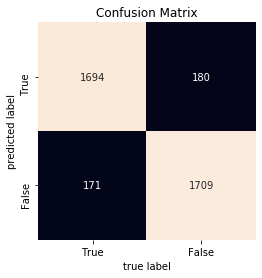

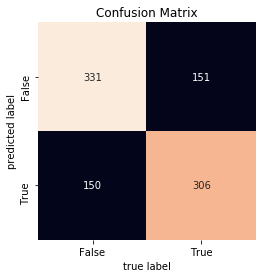

In [108]:
# confusion matrix for test and training data

lucem_illud_2020.plotConfusionMatrix(logistic_l1, train_data_df)
lucem_illud_2020.plotConfusionMatrix(logistic_l1, test_data_df)

In [109]:
# save the predictions for logistic_l1

test_data_df['log_predict'] = logistic_l1.predict(np.stack(test_data_df['vect'], axis=0))
test_data_df['log_predict_prob_true'] = logistic_l1.predict_proba(np.stack(test_data_df['vect'], axis=0))[:,0] #other is prop false

In [110]:
# calc the precision, recall, the F-measure, and AUC

print('Precision score is {}\n'.format(sklearn.metrics.precision_score(test_data_df['category'], test_data_df['log_predict'])))
print('Recall score is {}\n'.format(sklearn.metrics.recall_score(test_data_df['category'], test_data_df['log_predict'])))
print('F1 score is {}\n'.format(sklearn.metrics.f1_score(test_data_df['category'], test_data_df['log_predict'])))
print('AUC for each category is:')
lucem_illud_2020.evaluateClassifier(logistic_l1, test_data_df)

Precision score is 0.6710526315789473

Recall score is 0.6695842450765864

F1 score is 0.6703176341730558

AUC for each category is:


,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
False,0.320896,0.678867,0.686722,0.632482,0.688150
True,0.320896,0.678867,0.671053,0.610307,0.669584


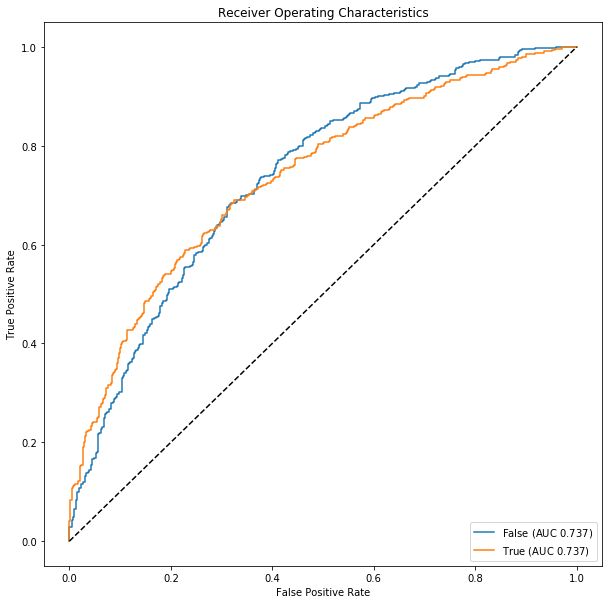

In [111]:
# perform an ROC visualization

lucem_illud_2020.plotMultiROC(logistic_l1, test_data_df)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


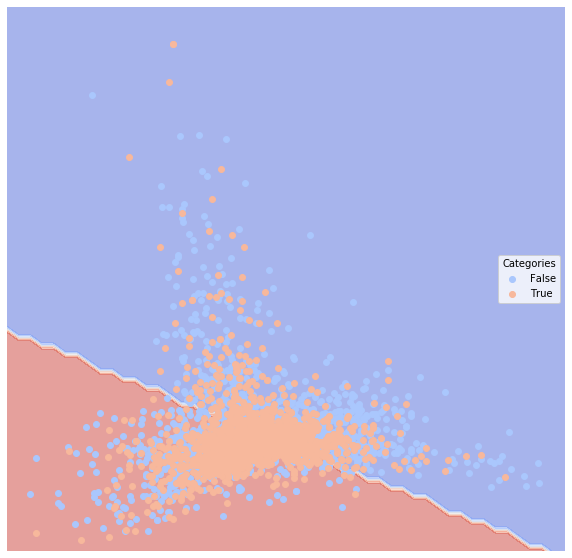

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


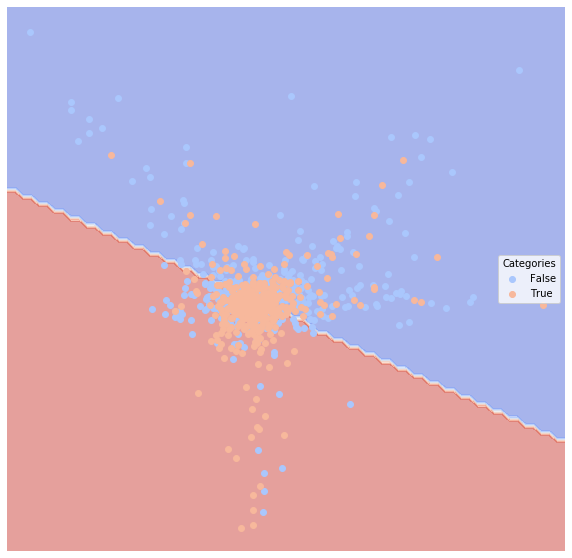

In [112]:
# Plot the region visualization

lucem_illud_2020.plotregions(logistic_l1, train_data_df)
lucem_illud_2020.plotregions(logistic_l1, test_data_df)

### Inference/Comment

In conclusion, from the precision score, AUC and the charts, logistic with L1 penality performs at least not bad, as the precision about 67%, but also not good. Further comparisons will be made when the uncoded text is analyzed and when the Naïve Bayes is applied below.

## 1.2 Logistic regression - uncoded text

In [113]:
# generate the uncoded data. As the corpus of sarcasm is all coded, I will choose one subset from the corpus and uncode it. 
# As the corpus is randomly listed itself, I will randomly pick 1000 rows.

df_sar2 = pandas.read_csv('sarcasm_v2.csv').drop('Label',axis=1)
df_sac_uncoded=df_sar2.sample(n=1000)
df_sac_uncoded

,Corpus,ID,Quote Text,Response Text
3200,GEN,GEN_notsarc_1570,I have to watch for snares now? :)I didn't say...,"Well, assuming that when the Bible says ""you"" ..."
860,GEN,GEN_sarc_0860,And your point was demonstrated to be specious...,Before you were claiming it was a slippery slo...
3368,HYP,HYP_sarc_0108,"sort of like saying you are born conservative,...",i'm surprised that some of the more frothing l...
44,GEN,GEN_sarc_0044,"In effect you are asking ""To those of you who ...",We came from apes not created. Why can't peopl...
4666,RQ,RQ_notsarc_0399,"actually, yes i do support full medical care f...",now isn't that a terribly socialistic position...
...,...,...,...,...
3363,HYP,HYP_sarc_0103,the question is why did you change the sentenc...,"as i said, for clarification, and no other rea..."
898,GEN,GEN_sarc_0898,"Somewhat so. If grammatically meant ""with prop...","Waxy, please read this. Maybe it will help you..."
3809,HYP,HYP_notsarc_0258,calvinism: total depravity unconditional elect...,oh yeah! i remember tulip. calvinism seems to ...
574,GEN,GEN_sarc_0574,I think it was the french who had come to the ...,"Well, the French have always been an independe..."


In [114]:
# tokenize uncoded data

df_sac_uncoded['text']=df_sac_uncoded['Quote Text']+df_sac_uncoded['Response Text']

df_sac_uncoded['tokenized_text'] = df_sac_uncoded['text'].apply(lambda x: lucem_illud_2020.word_tokenize(x))
df_sac_uncoded['normalized_text'] = df_sac_uncoded['tokenized_text'].apply(lambda x: lucem_illud_2020.normalizeTokens(x))

In [115]:
# drop unrelevant columns

df_sac_uncoded.drop(['Corpus','ID','Quote Text','Response Text'], axis=1)

,text,tokenized_text,normalized_text
3200,I have to watch for snares now? :)I didn't say...,"[I, have, to, watch, for, snares, now, I, did,...","[watch, snare, bible, male, human, race, soul,..."
860,And your point was demonstrated to be specious...,"[And, your, point, was, demonstrated, to, be, ...","[point, demonstrate, specious, source, contain..."
3368,"sort of like saying you are born conservative,...","[sort, of, like, saying, you, are, born, conse...","[sort, like, say, bear, conservative, life, st..."
44,"In effect you are asking ""To those of you who ...","[In, effect, you, are, asking, To, those, of, ...","[effect, ask, believe, adam, eve, adam, eve, m..."
4666,"actually, yes i do support full medical care f...","[actually, yes, i, do, support, full, medical,...","[actually, yes, support, medical, care, vetera..."
...,...,...,...
3363,the question is why did you change the sentenc...,"[the, question, is, why, did, you, change, the...","[question, change, sentence, say, thermonuclea..."
898,"Somewhat so. If grammatically meant ""with prop...","[Somewhat, so, If, grammatically, meant, with,...","[somewhat, grammatically, mean, proper, gramma..."
3809,calvinism: total depravity unconditional elect...,"[calvinism, total, depravity, unconditional, e...","[calvinism, total, depravity, unconditional, e..."
574,I think it was the french who had come to the ...,"[I, think, it, was, the, french, who, had, com...","[think, french, come, new, world, governor, lo..."


In [116]:
# put uncoded corpus into tf-idf matrix and vectorize text data

TFVects_uncode = TFVectorizer.transform(df_sac_uncoded['text'])
df_sac_uncoded['vect'] = [np.array(v).flatten() for v in TFVects_uncode.todense()]

# predict the result
df_sac_uncoded['pred_category_log'] = logistic_l1.predict(np.stack(df_sac_uncoded['vect'], axis=0))

In [117]:
# check the result of prediction

df_sac_uncoded[['text','pred_category_log']]

,text,pred_category_log
3200,I have to watch for snares now? :)I didn't say...,False
860,And your point was demonstrated to be specious...,True
3368,"sort of like saying you are born conservative,...",True
44,"In effect you are asking ""To those of you who ...",False
4666,"actually, yes i do support full medical care f...",True
...,...,...
3363,the question is why did you change the sentenc...,True
898,"Somewhat so. If grammatically meant ""with prop...",True
3809,calvinism: total depravity unconditional elect...,False
574,I think it was the french who had come to the ...,True


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


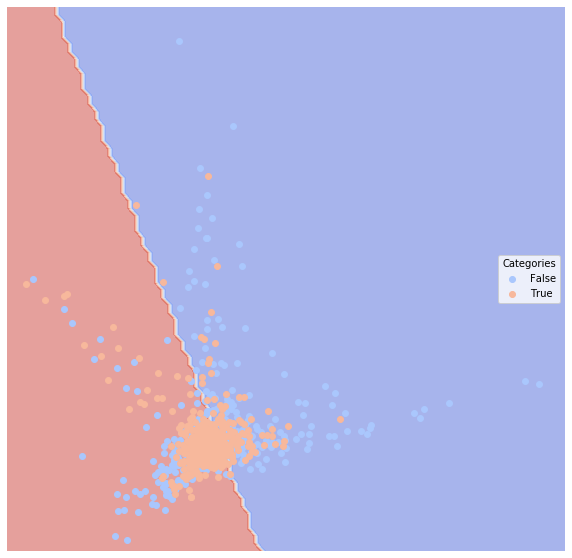

In [118]:
# check the region plots

df_sac_uncoded['category'] = df_sac_uncoded['pred_category_log']
lucem_illud_2020.plotregions(logistic_l1, df_sac_uncoded)

## 2.1 Naive Bayes - coded text

In [119]:
naiveBayes = sklearn.naive_bayes.BernoulliNB()
naiveBayes.fit(np.stack(train_data_df['vect'], axis=0), train_data_df['category'])

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [120]:
# calc the accuracy scores

print("Training:")
print(naiveBayes.score(np.stack(train_data_df['vect'], axis=0), train_data_df['category']))
print("Testing:")
print(naiveBayes.score(np.stack(test_data_df['vect'], axis=0), test_data_df['category']))

Training:
0.8420351624933404
Testing:
0.6684434968017058


In [121]:
# save the prediction

test_data_df['nb_predict'] = naiveBayes.predict(np.stack(test_data_df['vect'], axis=0))
test_data_df['nb_predict_prob_true'] = naiveBayes.predict_proba(np.stack(test_data_df['vect'], axis=0))[:,0] #other is prop false

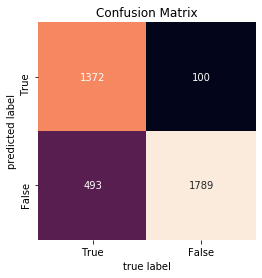

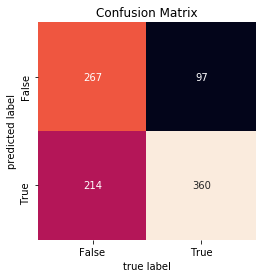

In [122]:
# confusion matrix

lucem_illud_2020.plotConfusionMatrix(naiveBayes, train_data_df)
lucem_illud_2020.plotConfusionMatrix(naiveBayes, test_data_df)

In [123]:
# calc the precision, recall, the F-measure, and AUC by naive bayes

print('Precision score is {}\n'.format(sklearn.metrics.precision_score(test_data_df['category'], test_data_df['nb_predict'])))
print('Recall score is {}\n'.format(sklearn.metrics.recall_score(test_data_df['category'], test_data_df['nb_predict'])))
print('F1 score is {}\n'.format(sklearn.metrics.f1_score(test_data_df['category'], test_data_df['nb_predict'])))
print('AUC for each category is:')
lucem_illud_2020.evaluateClassifier(naiveBayes, test_data_df)

Precision score is 0.627177700348432

Recall score is 0.787746170678337

F1 score is 0.6983511154219205

AUC for each category is:


,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
False,0.331557,0.67142,0.733516,0.635315,0.555094
True,0.331557,0.67142,0.627178,0.597468,0.787746


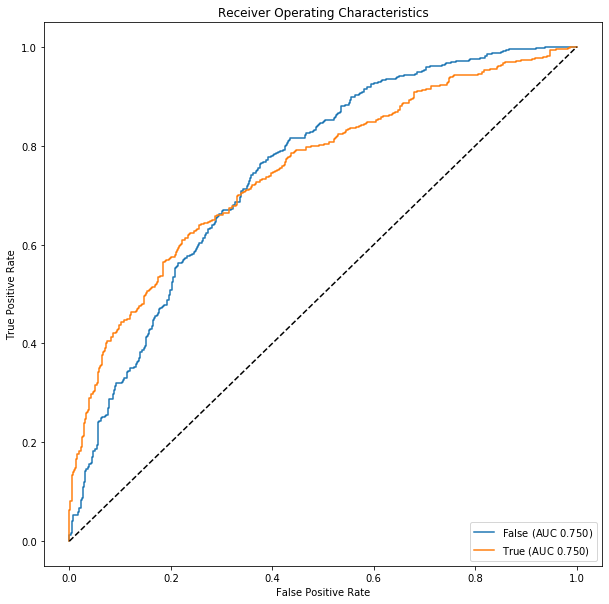

In [124]:
# perform an ROC visualization

lucem_illud_2020.plotMultiROC(naiveBayes, test_data_df)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


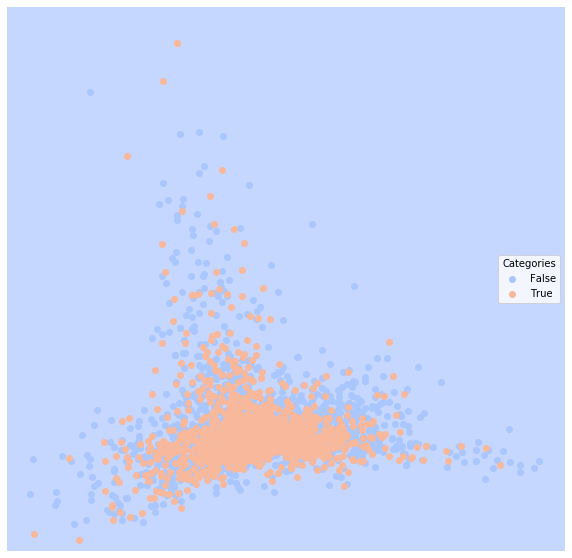

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


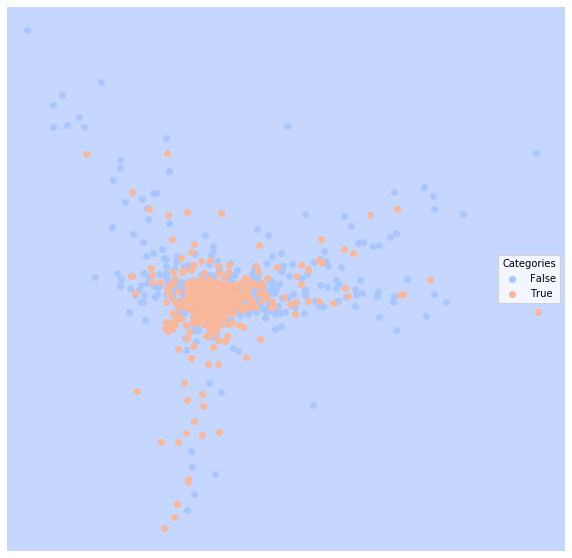

In [125]:
# Plot the region visualization

lucem_illud_2020.plotregions(naiveBayes, train_data_df)
lucem_illud_2020.plotregions(naiveBayes, test_data_df)

## 2.2 Naive Bayes - uncoded text

In [126]:
# put uncoded corpus into tf-idf matrix and vectorize text data

TFVects_uncode = TFVectorizer.transform(df_sac_uncoded['text'])
df_sac_uncoded['vect'] = [np.array(v).flatten() for v in TFVects_uncode.todense()]

# predict the result with naive bayes

df_sac_uncoded['pred_category_nb'] = naiveBayes.predict(np.stack(df_sac_uncoded['vect'], axis=0))

In [127]:
# check the result 

df_sac_uncoded[['text','pred_category_nb']]

,text,pred_category_nb
3200,I have to watch for snares now? :)I didn't say...,True
860,And your point was demonstrated to be specious...,True
3368,"sort of like saying you are born conservative,...",True
44,"In effect you are asking ""To those of you who ...",True
4666,"actually, yes i do support full medical care f...",False
...,...,...
3363,the question is why did you change the sentenc...,True
898,"Somewhat so. If grammatically meant ""with prop...",True
3809,calvinism: total depravity unconditional elect...,True
574,I think it was the french who had come to the ...,True


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


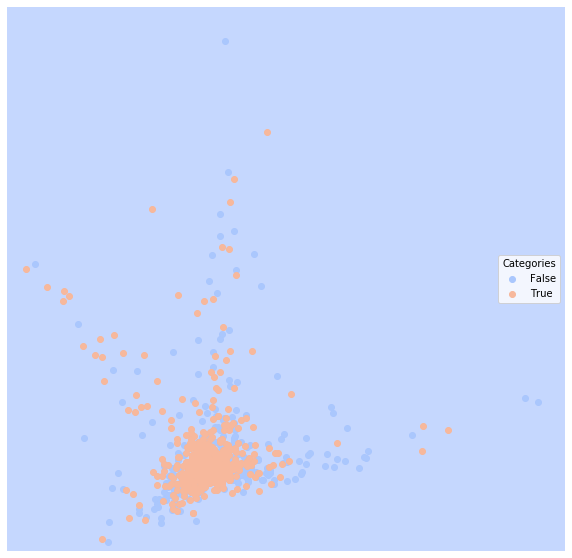

In [128]:
# check the region plots

df_sac_uncoded['category'] = df_sac_uncoded['pred_category_nb']
lucem_illud_2020.plotregions(naiveBayes, df_sac_uncoded)

### Inference/Comment

In conclusion, from the precision score, AUC and the charts, it is hard to tell whether naive bayes or the logistic with L1 penality performs better, as the naive bayes has lower precision, but higher F1 score. Therefore, in gereral, we say that given the corpus of sarcasm, two models perform similarly.

# Decision Trees

Decision trees can be used to predict both categorical/class labels (i.e., classification) and continuous labels (i.e., regression).

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

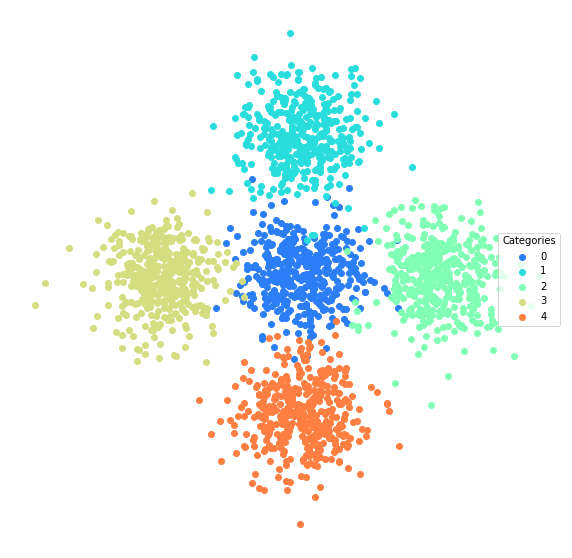

In [129]:
blobs_df = lucem_illud_2020.multiBlobs(noise=.2, centers=[(0,0), (0,5), (5,0), (-5,0), (0,-5)])
df_exampleTree_train, df_exampleTree_test = lucem_illud_2020.trainTestSplit(blobs_df)
lucem_illud_2020.plotter(df_exampleTree_train)

Now we import our Decision Tree classifier from sklearn.tree (familiar syntax) and fit it using the fit method.

In [130]:
clf_tree = sklearn.tree.DecisionTreeClassifier(max_depth=4,random_state=0)
clf_tree.fit(np.stack(df_exampleTree_train['vect'], axis =0), df_exampleTree_train['category'])

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

To see what's going on visually with the classification: 

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

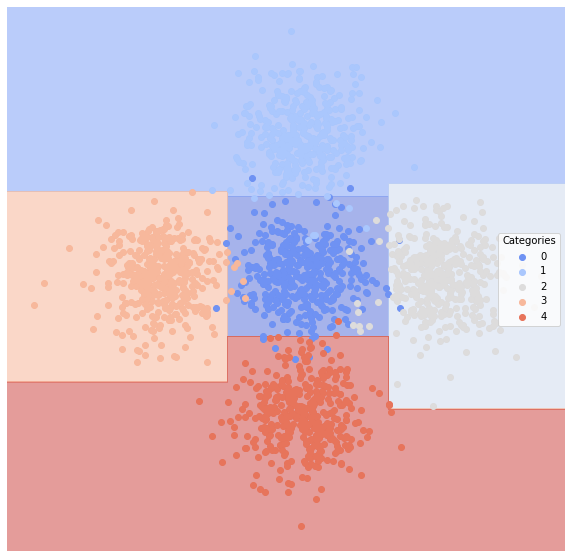

In [131]:
lucem_illud_2020.plotregions(clf_tree, df_exampleTree_train)

In [132]:
lucem_illud_2020.evaluateClassifier(clf_tree, df_exampleTree_test)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
0,0.020,0.980146,0.925926,0.911771,0.980392
1,0.010,0.984030,0.981982,0.961679,0.973214
2,0.006,0.984043,1.000000,0.974085,0.968085
3,0.010,0.978945,0.989796,0.958596,0.960396
4,0.002,0.998778,0.989130,0.989130,1.000000


Lets look at accuracy:

In [133]:
sklearn.metrics.accuracy_score(df_exampleTree_test['category'],clf_tree.predict(np.stack(df_exampleTree_test['vect'], axis = 0)))

0.976

What happens if we trim the tree?

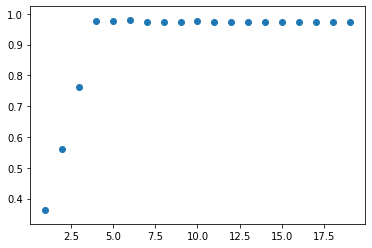

In [134]:
depthvec = []
scorevec = []
for i in range(1,20):
    tree2 = sklearn.tree.DecisionTreeClassifier(max_depth=i,random_state=0)
    tree2.fit(np.stack(df_exampleTree_train['vect'], axis =0), df_exampleTree_train['category'])
    score = sklearn.metrics.accuracy_score(df_exampleTree_test['category'], tree2.predict(np.stack(df_exampleTree_test['vect'], axis = 0)))
    depthvec.append(i)
    scorevec.append(score)
plt.scatter(depthvec,scorevec)
plt.show()

We can select different layers of the decision tree or "prune" it. At approximately four layers down in the decision tree, the shape is somewhat odd, suggesting that our model is overfitting beyond those four layers.

Combining multiple overfitting estimators turns out to be a key idea in machine learning. This is called **bagging** and is a type of **ensemble** method. The idea is to make many randomized estimators--each can overfit, as decision trees are wont to do--but then to combine them, ultimately producing a better classification. A **random forest** is produced by bagging decision trees.

In [135]:
tree = sklearn.tree.DecisionTreeClassifier(max_depth=10) #Create an instance of our decision tree classifier.

bag = sklearn.ensemble.BaggingClassifier(tree, n_estimators=100, max_samples=0.8, random_state=1) #Each tree uses up to 80% of the data

In [136]:
bag.fit(np.stack(df_exampleTree_train['vect'], axis =0), df_exampleTree_train['category']) #Fit the bagged classifier

BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=10,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',
                                                        random_state=None,
  

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

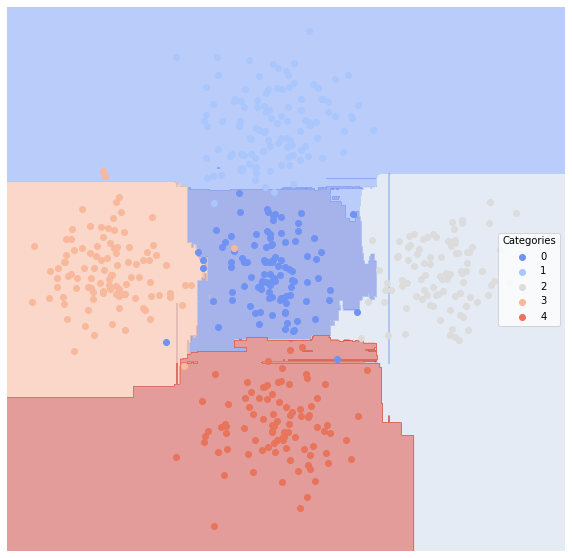

In [137]:
lucem_illud_2020.plotregions(bag, df_exampleTree_test)

In [138]:
lucem_illud_2020.evaluateClassifier(bag, df_exampleTree_test)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
0,0.014,0.976623,0.970297,0.940246,0.960784
1,0.010,0.987205,0.973451,0.960068,0.982143
2,0.002,0.998768,0.989474,0.989474,1.000000
3,0.010,0.978945,0.989796,0.958596,0.960396
4,0.004,0.997555,0.978495,0.978495,1.000000


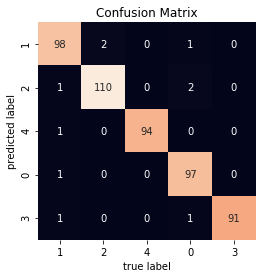

In [139]:
lucem_illud_2020.plotConfusionMatrix(bag, df_exampleTree_test)

## <span style="color:red">*Exercise 3*</span>

<span style="color:red">In the cells immediately following, perform decision tree and random forest classification (binary, multinomial or continuous) using training, testing and extrapolation (uncoded) data from texts and hand-classifications associated with your final project. As with ***Exercise 2***, these could be crowd-sourced codes gathered through Amazon Mechanical Turk last week. Visualize the classification of data points. Calculate relevant metrics (e.g., precision, recall, the F-measure, and AUC). Now build an ensemble classifier by bagging trees into a random forest. Visualize the result. How do these classifiers perform? What does ensemble learning do?

I will keep using the corpus used in Exer2.

## 1. Decision tree model

In [140]:
# set the decision tree model

sar_tree = sklearn.tree.DecisionTreeClassifier(max_depth=25,random_state=10)
sar_tree.fit(np.stack(train_data_df['vect'], axis =0), train_data_df['category'])

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=25, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=10, splitter='best')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


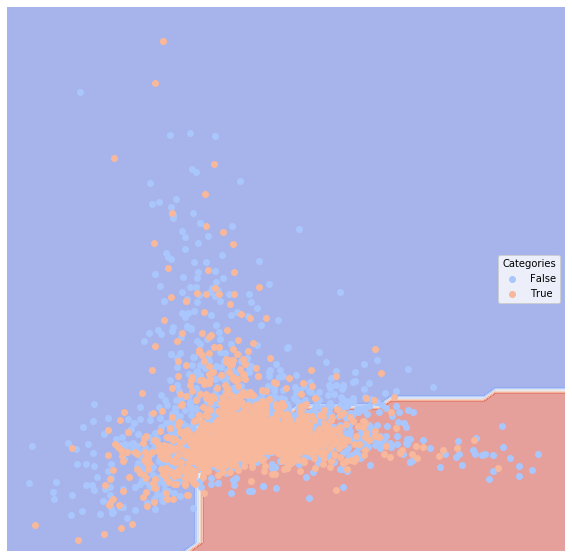

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


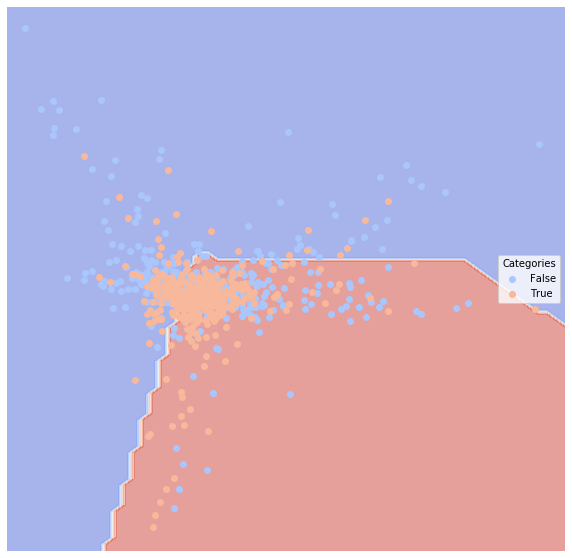

In [141]:
# visualize the classification

lucem_illud_2020.plotregions(sar_tree, train_data_df)
lucem_illud_2020.plotregions(sar_tree, test_data_df)

In [142]:
# calc the scores for the training and test dataset

print("Training:")
print(sar_tree.score(np.stack(train_data_df['vect'], axis=0), train_data_df['category']))
print("Testing:")
print(sar_tree.score(np.stack(test_data_df['vect'], axis=0), test_data_df['category']))

Training:
0.6537027171017581
Testing:
0.5543710021321961


In [143]:
# get the accuracy score

sklearn.metrics.accuracy_score(test_data_df['category'],sar_tree.predict(np.stack(test_data_df['vect'], axis = 0)))

0.5543710021321961

In [144]:
# save the prediction

test_data_df['tree_predict'] = sar_tree.predict(np.stack(test_data_df['vect'], axis=0))
test_data_df['tree_predict_prob_true'] = sar_tree.predict_proba(np.stack(test_data_df['vect'], axis=0))[:,0] #other is prop false

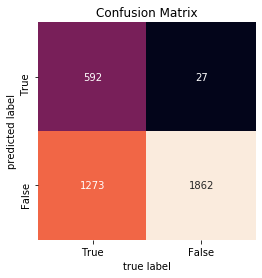

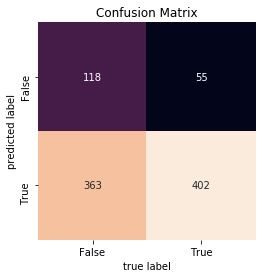

In [145]:
# confusion matrix for test and training data

lucem_illud_2020.plotConfusionMatrix(sar_tree, train_data_df)
lucem_illud_2020.plotConfusionMatrix(sar_tree, test_data_df)

In [146]:
# calc the precision, recall, the F-measure, and AUC by decision tree

print('Precision score is {}\n'.format(sklearn.metrics.precision_score(test_data_df['category'], test_data_df['tree_predict'])))
print('Recall score is {}\n'.format(sklearn.metrics.recall_score(test_data_df['category'], test_data_df['tree_predict'])))
print('F1 score is {}\n'.format(sklearn.metrics.f1_score(test_data_df['category'], test_data_df['tree_predict'])))
print('AUC for each category is:')
lucem_illud_2020.evaluateClassifier(sar_tree, test_data_df)

Precision score is 0.5254901960784314

Recall score is 0.8796498905908097

F1 score is 0.6579378068739772

AUC for each category is:


,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
False,0.445629,0.562486,0.682081,0.554323,0.245322
True,0.445629,0.562486,0.525490,0.520883,0.879650


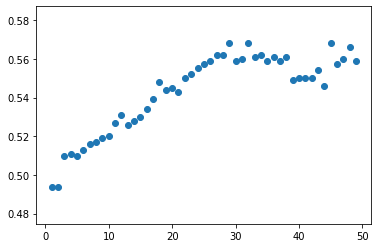

In [218]:
# trim the tree

depthvec = []
scorevec = []
for i in range(1,50):
    tree2 = sklearn.tree.DecisionTreeClassifier(max_depth=i,random_state=0)
    tree2.fit(np.stack(train_data_df['vect'], axis =0), train_data_df['category'])
    score = sklearn.metrics.accuracy_score(test_data_df['category'], tree2.predict(np.stack(test_data_df['vect'], axis = 0)))
    depthvec.append(i)
    scorevec.append(score)
plt.scatter(depthvec,scorevec)
plt.show()

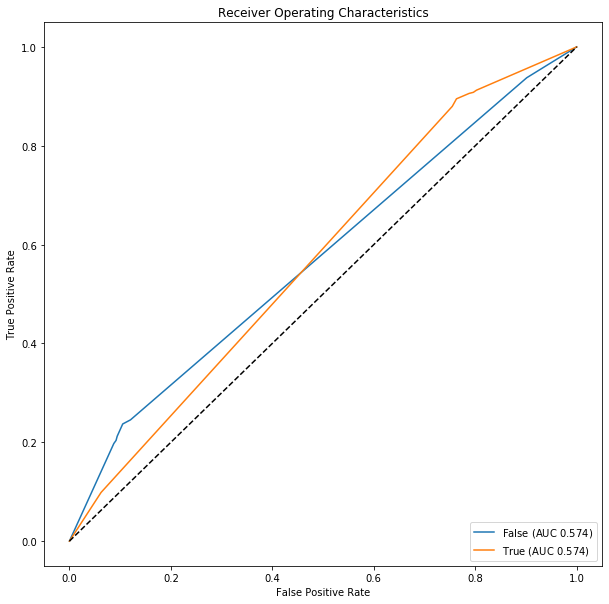

In [148]:
# Plot the ROC visualization

lucem_illud_2020.plotMultiROC(sar_tree, test_data_df)

In [149]:
# For the uncoded text

df_sac_uncoded['pred_category_tree'] = sar_tree.predict(np.stack(df_sac_uncoded['vect'], axis=0))

In [150]:
# check the result 

df_sac_uncoded[['text','pred_category_tree']]

,text,pred_category_tree
3200,I have to watch for snares now? :)I didn't say...,True
860,And your point was demonstrated to be specious...,True
3368,"sort of like saying you are born conservative,...",True
44,"In effect you are asking ""To those of you who ...",False
4666,"actually, yes i do support full medical care f...",True
...,...,...
3363,the question is why did you change the sentenc...,True
898,"Somewhat so. If grammatically meant ""with prop...",True
3809,calvinism: total depravity unconditional elect...,True
574,I think it was the french who had come to the ...,True


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


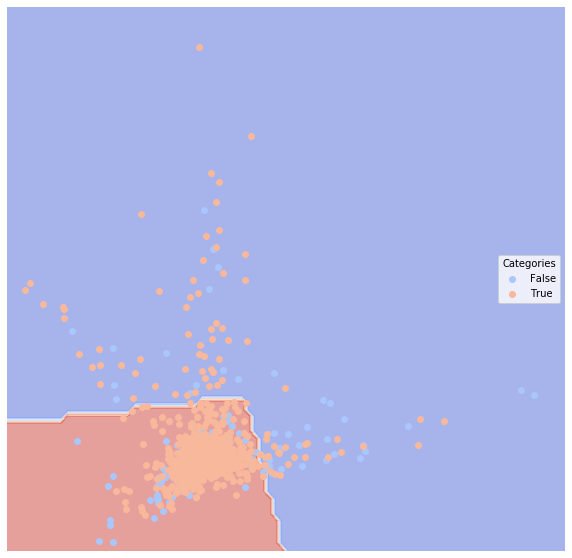

In [151]:
# check the region plots

df_sac_uncoded['category'] = df_sac_uncoded['pred_category_tree']
lucem_illud_2020.plotregions(sar_tree, df_sac_uncoded)

### Inference/Comment

It seems that the decision tree method predicts not good, with the accuracy only about 55% and precision about 53%, which is even worse than the logisitic and naive bayes methods.

Also, as the depth increases, there seems to have a constant increase for the accuracy, and after the depth of 30, the accuracy seems to be stable around 0.56.

## 2. Random forest model (Ensemble)

In [152]:
# set the random forest

tree_en = sklearn.tree.DecisionTreeClassifier(max_depth=30,random_state=0) #Create an instance of our decision tree classifier.
bag_en = sklearn.ensemble.BaggingClassifier(tree_en, n_estimators=100, max_samples=0.8, random_state=1) #Each tree uses up to 80% of the data

In [153]:
bag_en.fit(np.stack(train_data_df['vect'], axis =0), train_data_df['category']) #Fit the bagged classifier

BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=30,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',
                                                        random_state=0,
     

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


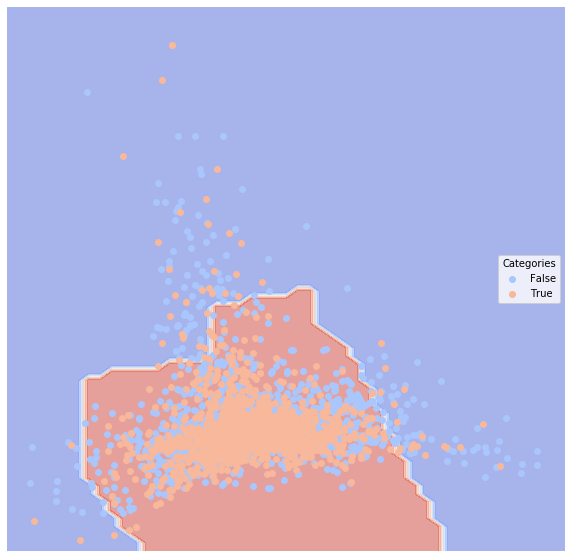

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


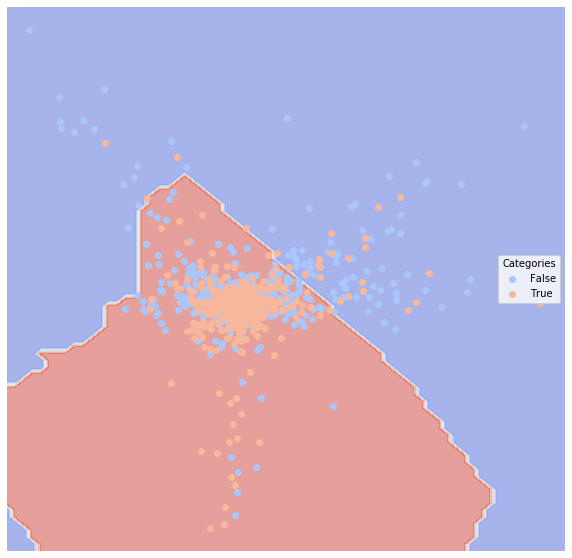

In [154]:
# visualize the classification

lucem_illud_2020.plotregions(bag_en, train_data_df)
lucem_illud_2020.plotregions(bag_en, test_data_df)

In [155]:
# calc the scores for the training and test dataset

print("Training:")
print(bag_en.score(np.stack(train_data_df['vect'], axis=0), train_data_df['category']))
print("Testing:")
print(bag_en.score(np.stack(test_data_df['vect'], axis=0), test_data_df['category']))

Training:
0.8454981353223229
Testing:
0.6226012793176973


In [156]:
# get the accuracy score

sklearn.metrics.accuracy_score(test_data_df['category'],bag_en.predict(np.stack(test_data_df['vect'], axis = 0)))

0.6226012793176973

In [157]:
# save the prediction

test_data_df['bag_predict'] = bag_en.predict(np.stack(test_data_df['vect'], axis=0))
test_data_df['bag_predict_prob_true'] = bag_en.predict_proba(np.stack(test_data_df['vect'], axis=0))[:,0] #other is prop false

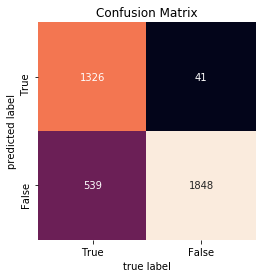

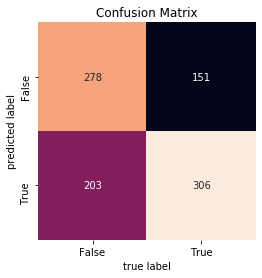

In [158]:
# confusion matrix for test and training data

lucem_illud_2020.plotConfusionMatrix(bag_en, train_data_df)
lucem_illud_2020.plotConfusionMatrix(bag_en, test_data_df)

In [159]:
# calc the precision, recall, the F-measure, and AUC by decision tree

print('Precision score is {}\n'.format(sklearn.metrics.precision_score(test_data_df['category'], test_data_df['bag_predict'])))
print('Recall score is {}\n'.format(sklearn.metrics.recall_score(test_data_df['category'], test_data_df['bag_predict'])))
print('F1 score is {}\n'.format(sklearn.metrics.f1_score(test_data_df['category'], test_data_df['bag_predict'])))
print('AUC for each category is:')
lucem_illud_2020.evaluateClassifier(bag_en, test_data_df)

Precision score is 0.6011787819253438

Recall score is 0.6695842450765864

F1 score is 0.6335403726708074

AUC for each category is:


,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
False,0.377399,0.623773,0.648019,0.590948,0.577963
True,0.377399,0.623773,0.601179,0.563521,0.669584


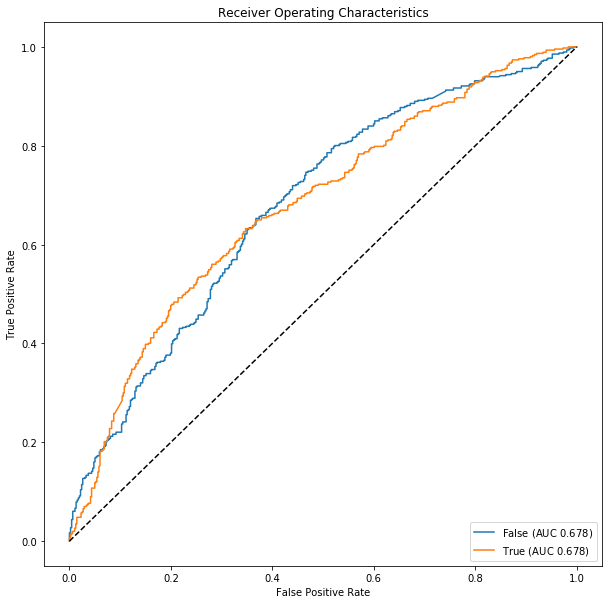

In [160]:
# Plot the ROC visualization

lucem_illud_2020.plotMultiROC(bag_en, test_data_df)

In [161]:
# For the uncoded text

df_sac_uncoded['pred_category_bag'] = bag_en.predict(np.stack(df_sac_uncoded['vect'], axis=0))

In [162]:
# check the result 

df_sac_uncoded[['text','pred_category_bag']]

,text,pred_category_bag
3200,I have to watch for snares now? :)I didn't say...,True
860,And your point was demonstrated to be specious...,True
3368,"sort of like saying you are born conservative,...",True
44,"In effect you are asking ""To those of you who ...",True
4666,"actually, yes i do support full medical care f...",True
...,...,...
3363,the question is why did you change the sentenc...,True
898,"Somewhat so. If grammatically meant ""with prop...",True
3809,calvinism: total depravity unconditional elect...,True
574,I think it was the french who had come to the ...,True


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


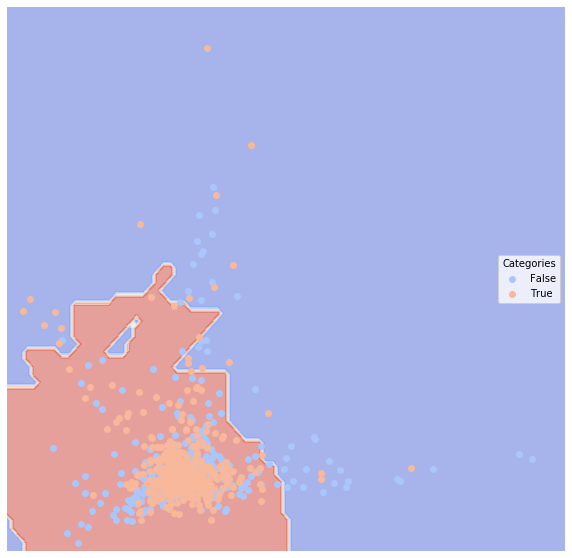

In [163]:
# check the region plots

df_sac_uncoded['category'] = df_sac_uncoded['pred_category_bag']
lucem_illud_2020.plotregions(bag_en, df_sac_uncoded)

### Inference/Comment

The ensemble method mainly gather multiple methods in order to make better performance than any single method that is contained in the ensemble. Here what I do above is bagging, one ensemble method, which bags 100 decision tree models into a random forest, with each tree using up to 80% of the data, and I combine them as a whole and perform the prediction. The performance is supposed to be better. 

From the charts and scores above, we can see that the performance of random forest (bagging) is better than a single decision tree, as the precision is about 60% and accuracy score about 62%, and AUC about 0.62. However, the precision about 60%, though much better than single decision tree, is still not a very high score. Therefore, we say that it performs fairly well, and better than single decision tree. 

# K-Nearest Neighbors

The K-Nearest neighbors classifier takes a simpler premise than those before: Find the closest labeled datapoint in set and "borrow" its label.

Let's use newsgroup data again.

In [164]:
newsgroupsDF[:5]

,text,category,source_file,tokenized_text,normalized_text
0,\n\nParadise and salvation are not the same th...,talk.religion.misc,../data/20news_home/20news-bydate-train/talk.r...,"[Paradise, and, salvation, are, not, the, same...","[paradise, salvation, thing, salvation, well, ..."
1,\nYou're admitting a lot more than that. You ...,talk.religion.misc,../data/20news_home/20news-bydate-train/talk.r...,"[You, 're, admitting, a, lot, more, than, that...","[admit, lot, admit, moral, situational, admit,..."
2,"\n\nJesus also recognized other holy days, lik...",talk.religion.misc,../data/20news_home/20news-bydate-train/talk.r...,"[Jesus, also, recognized, other, holy, days, l...","[jesus, recognize, holy, day, like, passover, ..."
3,In <lsjc8cINNmc1@saltillo.cs.utexas.edu> turpi...,talk.religion.misc,../data/20news_home/20news-bydate-train/talk.r...,"[In, <, lsjc8cINNmc1@saltillo.cs.utexas.edu, >...","[<, lsjc8cinnmc1@saltillo.cs.utexas.edu, >, tu..."
4,"\nI'm sorry, but He does not! Ever read the F...",talk.religion.misc,../data/20news_home/20news-bydate-train/talk.r...,"[I, 'm, sorry, but, He, does, not, Ever, read,...","[be, sorry, read, commandment]"


Make a testing and training set:

In [165]:
holdBackFraction = .2
train_ng_df, test_ng_df = lucem_illud_2020.trainTestSplit(newsgroupsDF, holdBackFraction=holdBackFraction)

Let's initialize our k-nearest neighbors classifier:

In [166]:
n_neighbors = 15
weights="uniform"
clf_knearest = sklearn.neighbors.KNeighborsClassifier(n_neighbors, weights=weights)

Let's try to classify using the TF-IDF vectors:

In [167]:
TFVectorizer_ng = sklearn.feature_extraction.text.TfidfVectorizer(max_df=100, min_df=2, stop_words='english', norm='l2')
TFVects_ng = TFVectorizer_ng.fit_transform(train_ng_df['text'])
train_ng_df['vect'] = [np.array(v).flatten() for v in TFVects_ng.todense()]

In [168]:
clf_knearest.fit(np.stack(train_ng_df['vect'], axis = 0), train_ng_df['category'])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                     weights='uniform')

In [169]:
lucem_illud_2020.evaluateClassifier(clf_knearest, train_ng_df)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
soc.religion.christian,0.283807,0.505061,1.000000,0.293929,0.010121
sci.space,0.322113,0.620955,0.410811,0.337733,0.500000
comp.graphics,0.321532,0.633068,0.429060,0.356334,0.532909
talk.religion.misc,0.302960,0.655964,0.309689,0.254944,0.592715


And lets look at the testing data

In [170]:
#Create vectors
TFVects_test = TFVectorizer_ng.transform(test_ng_df['text'])
test_ng_df['vect'] = [np.array(v).flatten() for v in TFVects_test.todense()]

#Add to df
test_ng_df['nb_predict'] = clf_knearest.predict(np.stack(test_ng_df['vect'], axis=0))

#Test
print("Testing score:")
print(clf_knearest.score(np.stack(test_ng_df['vect'], axis=0), test_ng_df['category']))

Testing score:
0.21627906976744185


Let's produce another confusion matrix:

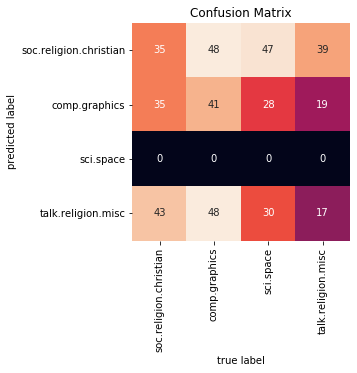

In [171]:
lucem_illud_2020.plotConfusionMatrix(clf_knearest, test_ng_df)

You can produce the PCA space visual if you want, altough it can take a very long time, so we'll leave it optionally commented out:

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

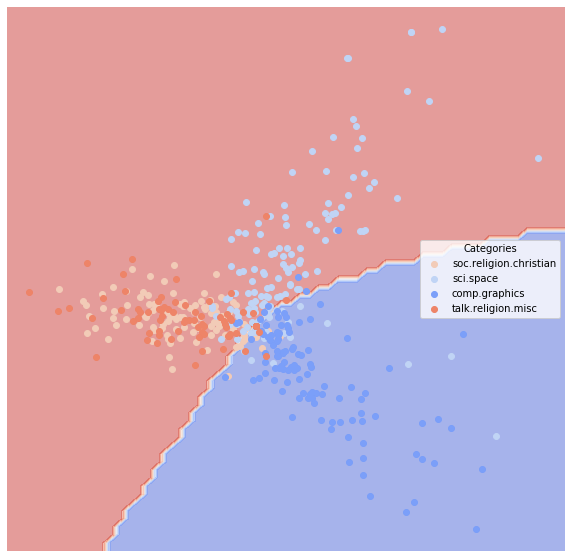

In [172]:
lucem_illud_2020.plotregions(clf_knearest, test_ng_df)

## <span style="color:red">*Exercise 4*</span>

<span style="color:red">In the cells immediately following, perform and visualize k-nearest neighbor classification using training, testing and extrapolation (uncoded) data from texts and hand-classifications associated with your final project. Visualize the classification of data points and calculate relevant metrics (e.g., precision, recall, the F-measure, and AUC). Articulate how the *k*-nearest neighbor approach relates to *k*-means clustering explored in ***week 3***?

In [173]:
# I will still use the corpus of sarcasm as before.

# set the knn classifier

n_neighbors = 15
weights="uniform"
sar_knearest = sklearn.neighbors.KNeighborsClassifier(n_neighbors, weights=weights)

sar_knearest.fit(np.stack(train_data_df['vect'], axis = 0), train_data_df['category'])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                     weights='uniform')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


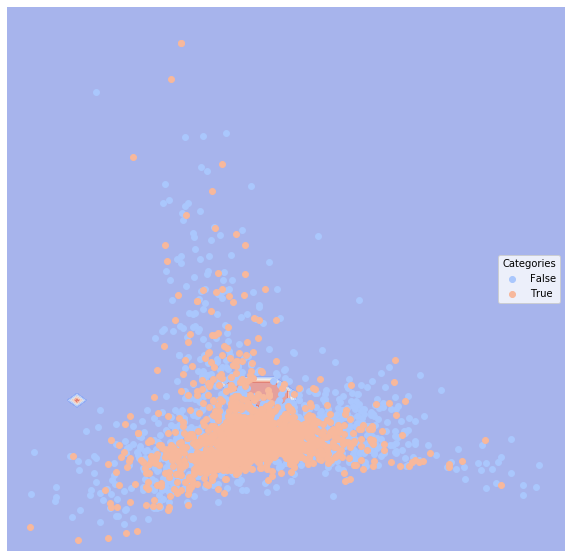

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


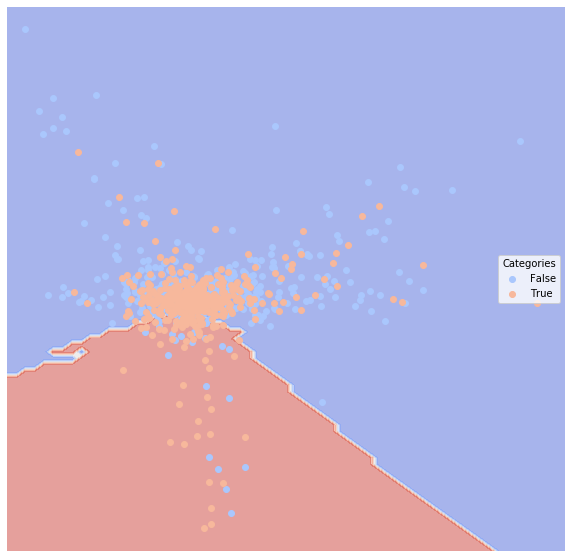

In [174]:
# visualize the classification

lucem_illud_2020.plotregions(sar_knearest, train_data_df)
lucem_illud_2020.plotregions(sar_knearest, test_data_df)

In [175]:
# calc the scores for the training and test dataset

print("Training:")
print(sar_knearest.score(np.stack(train_data_df['vect'], axis=0), train_data_df['category']))
print("Testing:")
print(sar_knearest.score(np.stack(test_data_df['vect'], axis=0), test_data_df['category']))

Training:
0.6883324453915823
Testing:
0.6257995735607675


In [176]:
# get the accuracy score

sklearn.metrics.accuracy_score(test_data_df['category'],sar_knearest.predict(np.stack(test_data_df['vect'], axis = 0)))

0.6257995735607675

In [177]:
# save the prediction

test_data_df['knn_predict'] = sar_knearest.predict(np.stack(test_data_df['vect'], axis=0))
test_data_df['knn_predict_prob_true'] = sar_knearest.predict_proba(np.stack(test_data_df['vect'], axis=0))[:,0] #other is prop false

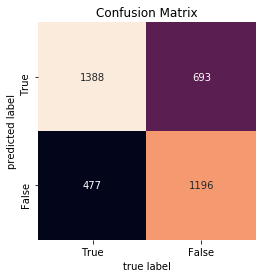

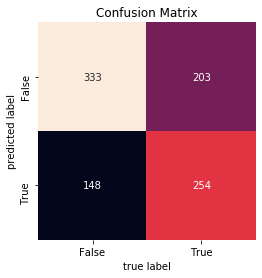

In [178]:
# confusion matrix for test and training data

lucem_illud_2020.plotConfusionMatrix(sar_knearest, train_data_df)
lucem_illud_2020.plotConfusionMatrix(sar_knearest, test_data_df)

In [179]:
# calc the precision, recall, the F-measure, and AUC by decision tree

print('Precision score is {}\n'.format(sklearn.metrics.precision_score(test_data_df['category'], test_data_df['knn_predict'])))
print('Recall score is {}\n'.format(sklearn.metrics.recall_score(test_data_df['category'], test_data_df['knn_predict'])))
print('F1 score is {}\n'.format(sklearn.metrics.f1_score(test_data_df['category'], test_data_df['knn_predict'])))
print('AUC for each category is:')
lucem_illud_2020.evaluateClassifier(sar_knearest, test_data_df)

Precision score is 0.6318407960199005

Recall score is 0.5557986870897156

F1 score is 0.5913853317811408

AUC for each category is:


,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
False,0.3742,0.624053,0.621269,0.587892,0.692308
True,0.3742,0.624053,0.631841,0.567594,0.555799


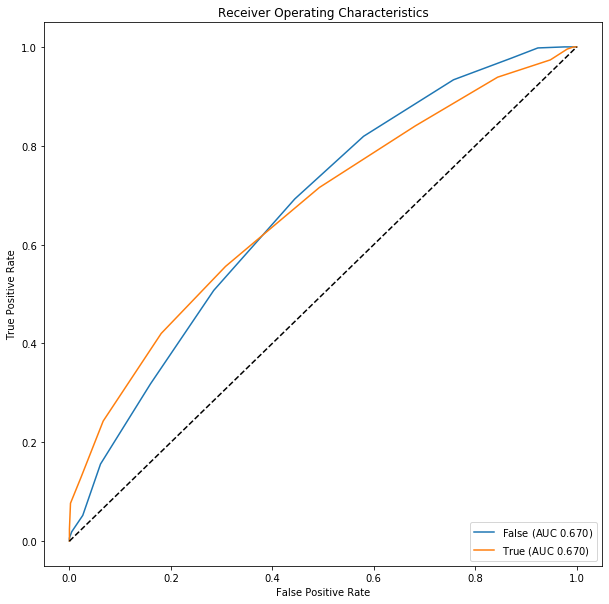

In [180]:
# Plot the ROC visualization

lucem_illud_2020.plotMultiROC(sar_knearest, test_data_df)

In [181]:
# For the uncoded text

df_sac_uncoded['pred_category_knn'] = sar_knearest.predict(np.stack(df_sac_uncoded['vect'], axis=0))

In [182]:
# check the result 

df_sac_uncoded[['text','pred_category_knn']]

,text,pred_category_knn
3200,I have to watch for snares now? :)I didn't say...,True
860,And your point was demonstrated to be specious...,False
3368,"sort of like saying you are born conservative,...",True
44,"In effect you are asking ""To those of you who ...",False
4666,"actually, yes i do support full medical care f...",True
...,...,...
3363,the question is why did you change the sentenc...,True
898,"Somewhat so. If grammatically meant ""with prop...",True
3809,calvinism: total depravity unconditional elect...,True
574,I think it was the french who had come to the ...,False


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


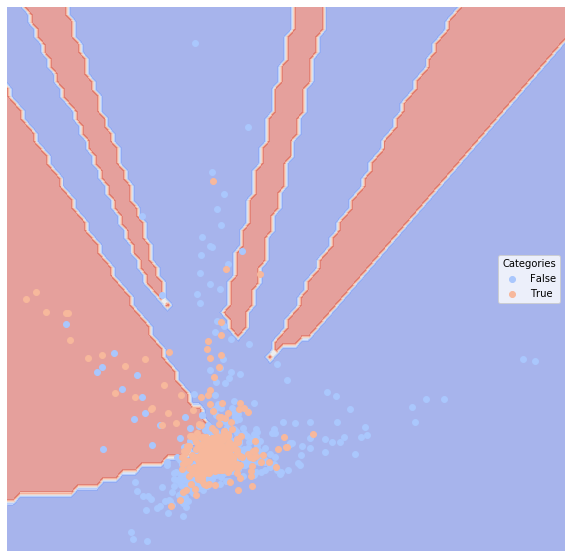

In [183]:
# check the region plots

df_sac_uncoded['category'] = df_sac_uncoded['pred_category_knn']
lucem_illud_2020.plotregions(sar_knearest, df_sac_uncoded)

### Inference/Comment

From charts and metrics above, K nearest neighbors performs quite good, and slightly better than random forest(ensemble), with the precision about 63%. Overall, we say that the kNN method performs fairly well.

As for the kNN and k-means clustering, they are quite different methods. One basic difference is that kNN is a supervised classification method while the k-means clustering is an unsupervised one. They also have different kinds of data source and process. For the k-means clustering, it takes the unlabeled data and tries to group them into “k” number of clusters. It is called "unsupervised" since the data has no external classification. For the kNN, it takes a bunch of labeled data and uses them to learn how to label other data points. To label a new point, it looks at the labeled points closest to that new point which are its nearest neighbors, and has those neighbors vote. Therefore, for whichever label, the most of the neighbors have is the label for the new point. Therefore, given their different patterns, two methods are suitable for different tasks. 

# SVMs

Now we will examine Support Vector Machines, an approach that creates the partition that preserves the "maximum margin" between classes.

We will use a few sub forums from reddit--which tend to share text rather than memes--namely `talesfromtechsupport`, `badroommates`, `weeabootales` and `relationships`. The top 100 text posts from each have been saved to `data/reddit.csv`.

In [184]:
redditDf = pandas.read_csv('../data/reddit.csv', index_col = 0)

#Drop a couple missing values

redditDf = redditDf.dropna()

#Set category

redditDf['category'] = redditDf['subreddit']

#tokenize and normalize
redditDf['tokenized_text'] = redditDf['text'].apply(lambda x: lucem_illud_2020.word_tokenize(x))
redditDf['normalized_text'] = redditDf['tokenized_text'].apply(lambda x: lucem_illud_2020.normalizeTokens(x))

We will tf.idf the data to make our vectors:

In [185]:
redditTFVectorizer = sklearn.feature_extraction.text.TfidfVectorizer(max_df=0.5, min_df=3, stop_words='english', norm='l2')
redditTFVects = redditTFVectorizer.fit_transform([' '.join(l) for l in redditDf['normalized_text']])
redditDf['vect'] = [np.array(v).flatten() for v in redditTFVects.todense()]

Initilize the model and make a train test split:

In [186]:
holdBackFraction = .2
train_redditDf, test_redditDf = lucem_illud_2020.trainTestSplit(redditDf, holdBackFraction=holdBackFraction)

In [187]:
clf_svm = sklearn.svm.SVC(kernel='linear', probability = False)
#probability = True is slower but  lets you call predict_proba()
clf_svm.fit(np.stack(train_redditDf['vect'], axis=0), train_redditDf['category'])

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

...and consider the results:

In [188]:
lucem_illud_2020.evaluateClassifier(clf_svm, test_redditDf)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
Tales From Tech Support,0.009404,0.990034,0.977778,0.969926,0.988764
Bad Roommates: Tales of Irritation,0.015674,0.978493,0.953846,0.930308,0.968750
Weeaboo Tales: stories about the extreme fans of japanese culture,0.009404,0.983146,1.000000,0.975697,0.966292
Relationships,0.009404,0.989374,0.974359,0.964840,0.987013


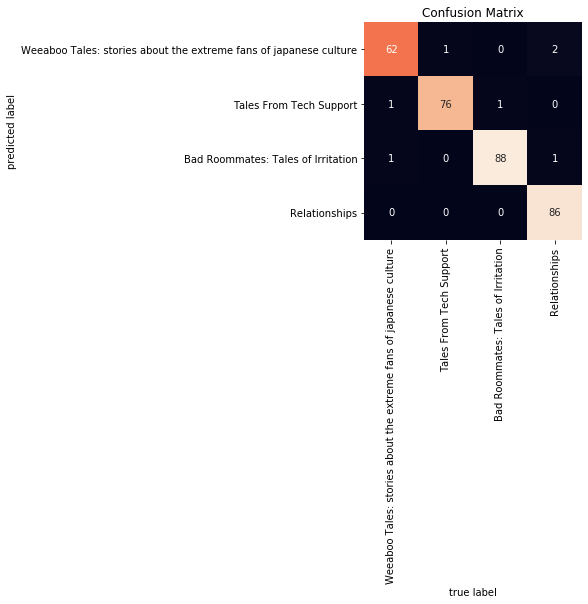

In [189]:
lucem_illud_2020.plotConfusionMatrix(clf_svm, test_redditDf)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

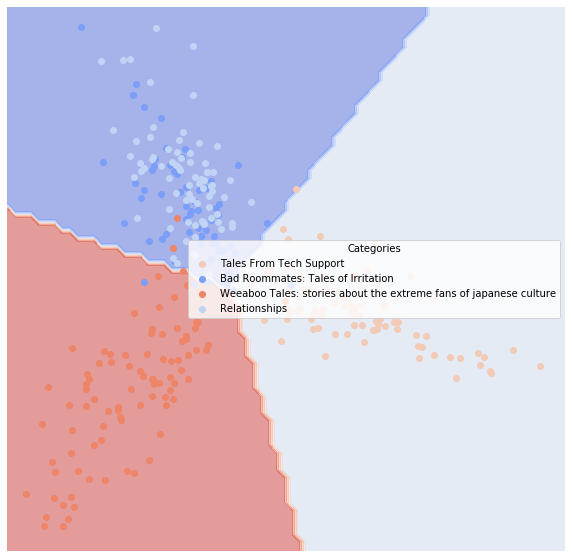

In [190]:
lucem_illud_2020.plotregions(clf_svm, test_redditDf)

# Neural Nets

We include an example of a simple neural network, the Multi-layer Perceptron (MLP) that learns a function $f(\cdot): R^m \rightarrow R^o$ by training on a dataset, where $m$ is the number of dimensions for input and $o$ is the number of dimensions for output. Given a set of features $X = {x_1, x_2, ..., x_m}$ and a target $y$, it can learn a non-linear function approximator for either classification or regression. It is different from logistic regression, in that between the input and the output layer, there can be one or more non-linear layers, called hidden layers. The following figure shows a one hidden layer MLP with scalar output. ![title](../data/multilayerperceptron_network.png) The leftmost layer, known as the input layer, consists of a set of "neurons" $\{x_i | x_1, x_2, ..., x_m\}$ representing the input features (e.g., weighted words). Each neuron in the hidden layer transforms the values from the previous layer with a weighted linear summation $w_1x_1 + w_2x_2 + ... + w_mx_m$, followed by a non-linear activation function $g(\cdot):R \rightarrow R$ - like the logistic or hyperbolic tan function. The output layer receives the values from the last hidden layer and transforms them into output values.

In [191]:
clf_nn = sklearn.neural_network.MLPClassifier()
clf_nn.fit(np.stack(train_redditDf['vect'], axis=0), train_redditDf['category'])

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [192]:
lucem_illud_2020.evaluateClassifier(clf_nn, test_redditDf)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
Tales From Tech Support,0.006270,0.992208,0.988764,0.980789,0.988764
Bad Roommates: Tales of Irritation,0.025078,0.966759,0.924242,0.890323,0.953125
Weeaboo Tales: stories about the extreme fans of japanese culture,0.015674,0.975354,0.988372,0.956490,0.955056
Relationships,0.021944,0.972255,0.948718,0.921159,0.961039


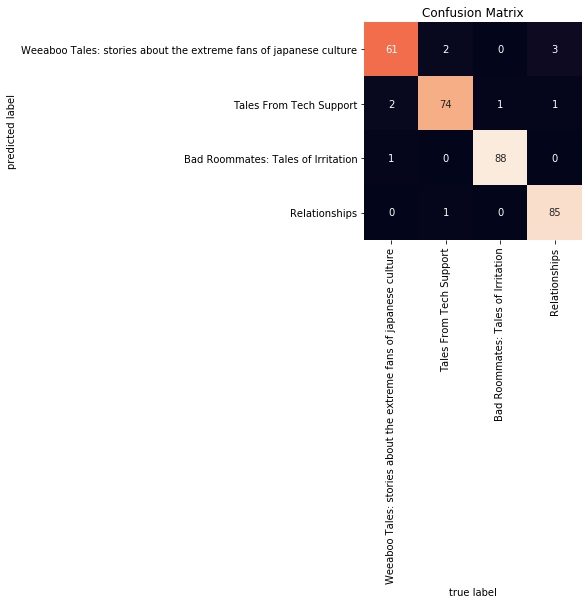

In [193]:
lucem_illud_2020.plotConfusionMatrix(clf_nn, test_redditDf)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

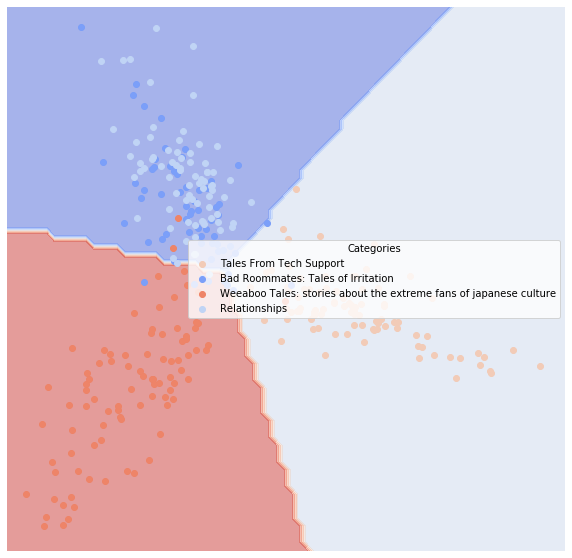

In [194]:
lucem_illud_2020.plotregions(clf_nn, test_redditDf)

It performs very well.

## <span style="color:red">*Exercise 5*</span>

<span style="color:red">In the cells immediately following, perform a neural network classification and calculate relevant metrics (e.g., precision, recall, the F-measure, and AUC). How does this classify relevant to *k*-nearest neighbor, Naive Bayes, logistic and decision-tree approaches?

## 1. SVM

In [195]:
# I will still use the corpus of sarcasm as before.

# set the svm classifier

sar_svm = sklearn.svm.SVC(kernel='linear', probability = True)
#probability = True is slower but  lets you call predict_proba()
sar_svm.fit(np.stack(train_data_df['vect'], axis=0), train_data_df['category'])

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


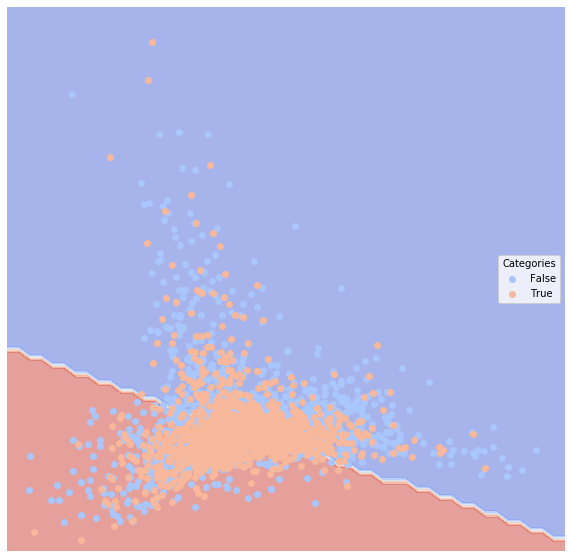

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


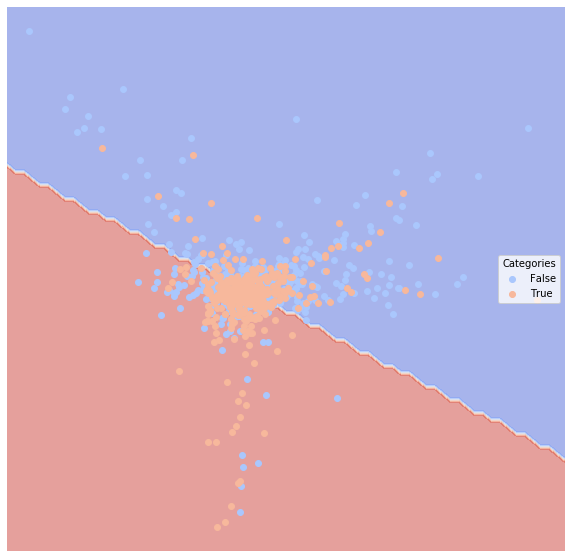

In [196]:
# visualize the classification

lucem_illud_2020.plotregions(sar_svm, train_data_df)
lucem_illud_2020.plotregions(sar_svm, test_data_df)

In [197]:
# calc the scores for the training and test dataset

print("Training:")
print(sar_svm.score(np.stack(train_data_df['vect'], axis=0), train_data_df['category']))
print("Testing:")
print(sar_svm.score(np.stack(test_data_df['vect'], axis=0), test_data_df['category']))

Training:
0.9262120404901438
Testing:
0.6556503198294243


In [198]:
# get the accuracy score

sklearn.metrics.accuracy_score(test_data_df['category'],sar_svm.predict(np.stack(test_data_df['vect'], axis = 0)))

0.6556503198294243

In [199]:
# save the prediction

test_data_df['svm_predict'] = sar_svm.predict(np.stack(test_data_df['vect'], axis=0))
test_data_df['svm_predict_prob_true'] = sar_svm.predict_proba(np.stack(test_data_df['vect'], axis=0))[:,0] #other is prop false

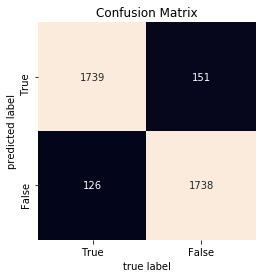

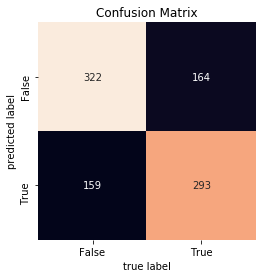

In [200]:
# confusion matrix for test and training data

lucem_illud_2020.plotConfusionMatrix(sar_svm, train_data_df)
lucem_illud_2020.plotConfusionMatrix(sar_svm, test_data_df)

In [201]:
# calc the precision, recall, the F-measure, and AUC by decision tree

print('Precision score is {}\n'.format(sklearn.metrics.precision_score(test_data_df['category'], test_data_df['svm_predict'])))
print('Recall score is {}\n'.format(sklearn.metrics.recall_score(test_data_df['category'], test_data_df['svm_predict'])))
print('F1 score is {}\n'.format(sklearn.metrics.f1_score(test_data_df['category'], test_data_df['svm_predict'])))
print('AUC for each category is:')
lucem_illud_2020.evaluateClassifier(sar_svm, test_data_df)

Precision score is 0.6482300884955752

Recall score is 0.6411378555798687

F1 score is 0.6446644664466445

AUC for each category is:


,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
False,0.34435,0.655288,0.662551,0.613047,0.669439
True,0.34435,0.655288,0.648230,0.590445,0.641138


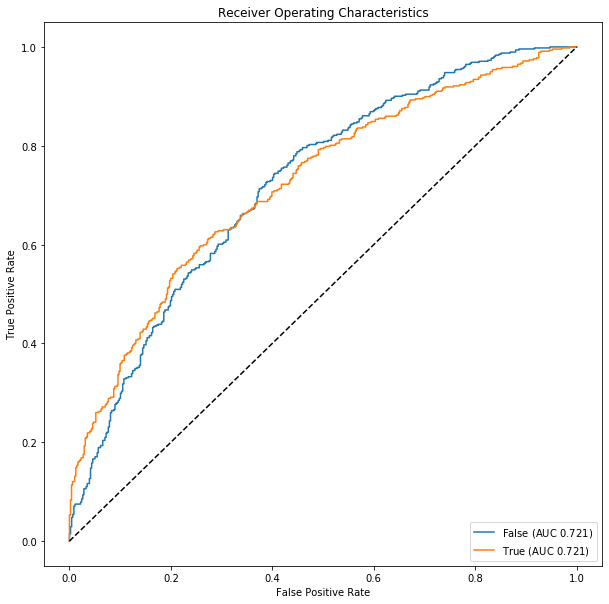

In [202]:
# Plot the ROC visualization

lucem_illud_2020.plotMultiROC(sar_svm, test_data_df)

In [203]:
# For the uncoded text

df_sac_uncoded['pred_category_svm'] = sar_svm.predict(np.stack(df_sac_uncoded['vect'], axis=0))

In [204]:
# check the result 

df_sac_uncoded[['text','pred_category_svm']]

,text,pred_category_svm
3200,I have to watch for snares now? :)I didn't say...,False
860,And your point was demonstrated to be specious...,True
3368,"sort of like saying you are born conservative,...",True
44,"In effect you are asking ""To those of you who ...",False
4666,"actually, yes i do support full medical care f...",True
...,...,...
3363,the question is why did you change the sentenc...,True
898,"Somewhat so. If grammatically meant ""with prop...",True
3809,calvinism: total depravity unconditional elect...,False
574,I think it was the french who had come to the ...,True


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


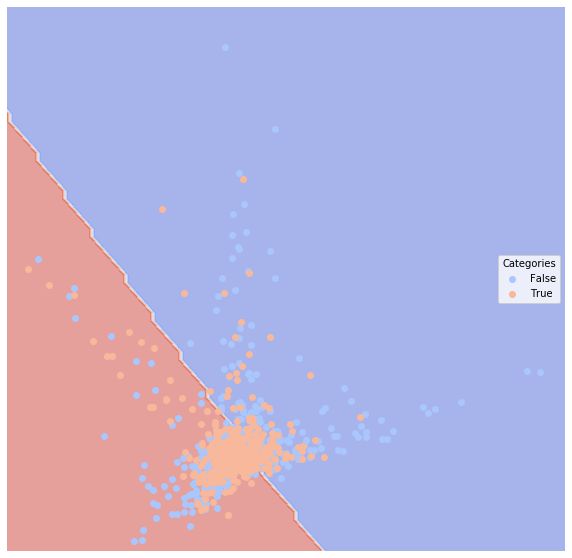

In [205]:
# check the region plots

df_sac_uncoded['category'] = df_sac_uncoded['pred_category_svm']
lucem_illud_2020.plotregions(sar_svm, df_sac_uncoded)

## 2. Neural Network

In [206]:
# set the neural network classifier

sar_nn = sklearn.neural_network.MLPClassifier()
sar_nn.fit(np.stack(train_data_df['vect'], axis=0), train_data_df['category'])

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


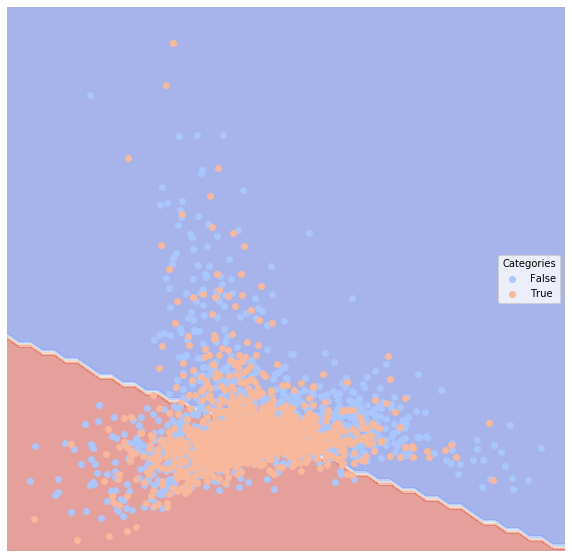

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


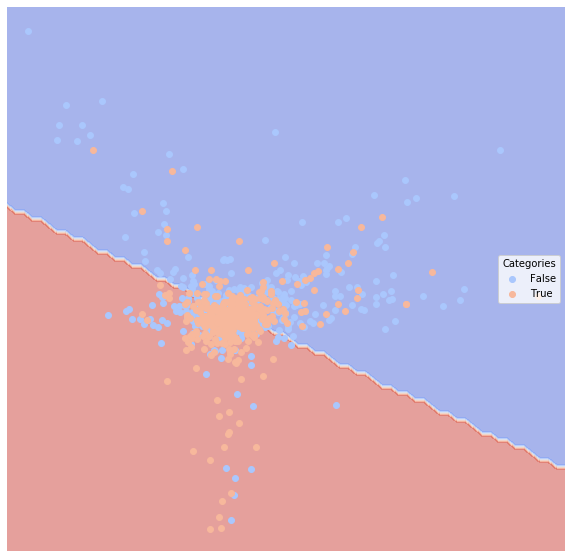

In [207]:
# visualize the classification

lucem_illud_2020.plotregions(sar_nn, train_data_df)
lucem_illud_2020.plotregions(sar_nn, test_data_df)

In [208]:
# calc the scores for the training and test dataset

print("Training:")
print(sar_nn.score(np.stack(train_data_df['vect'], axis=0), train_data_df['category']))
print("Testing:")
print(sar_nn.score(np.stack(test_data_df['vect'], axis=0), test_data_df['category']))

Training:
0.999200852424081
Testing:
0.6343283582089553


In [209]:
# get the accuracy score

sklearn.metrics.accuracy_score(test_data_df['category'],sar_nn.predict(np.stack(test_data_df['vect'], axis = 0)))

0.6343283582089553

In [210]:
# save the prediction

test_data_df['nn_predict'] = sar_nn.predict(np.stack(test_data_df['vect'], axis=0))
test_data_df['nn_predict_prob_true'] = sar_nn.predict_proba(np.stack(test_data_df['vect'], axis=0))[:,0] #other is prop false

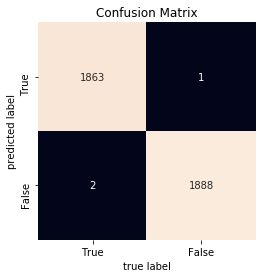

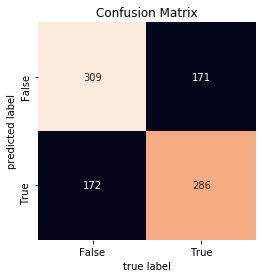

In [211]:
# confusion matrix for test and training data

lucem_illud_2020.plotConfusionMatrix(sar_nn, train_data_df)
lucem_illud_2020.plotConfusionMatrix(sar_nn, test_data_df)

In [212]:
# calc the precision, recall, the F-measure, and AUC by decision tree

print('Precision score is {}\n'.format(sklearn.metrics.precision_score(test_data_df['category'], test_data_df['nn_predict'])))
print('Recall score is {}\n'.format(sklearn.metrics.recall_score(test_data_df['category'], test_data_df['nn_predict'])))
print('F1 score is {}\n'.format(sklearn.metrics.f1_score(test_data_df['category'], test_data_df['nn_predict'])))
print('AUC for each category is:')
lucem_illud_2020.evaluateClassifier(sar_nn, test_data_df)

Precision score is 0.6244541484716157

Recall score is 0.6258205689277899

F1 score is 0.6251366120218579

AUC for each category is:


,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
False,0.365672,0.634116,0.643750,0.596921,0.642412
True,0.365672,0.634116,0.624454,0.573099,0.625821


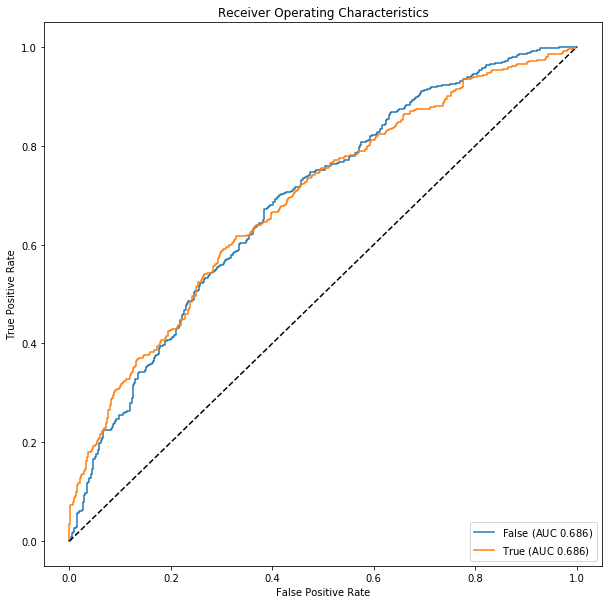

In [213]:
# Plot the ROC visualization

lucem_illud_2020.plotMultiROC(sar_nn, test_data_df)

In [214]:
# For the uncoded text

df_sac_uncoded['pred_category_nn'] = sar_nn.predict(np.stack(df_sac_uncoded['vect'], axis=0))

In [215]:
# check the result 

df_sac_uncoded[['text','pred_category_nn']]

,text,pred_category_nn
3200,I have to watch for snares now? :)I didn't say...,False
860,And your point was demonstrated to be specious...,True
3368,"sort of like saying you are born conservative,...",True
44,"In effect you are asking ""To those of you who ...",True
4666,"actually, yes i do support full medical care f...",True
...,...,...
3363,the question is why did you change the sentenc...,True
898,"Somewhat so. If grammatically meant ""with prop...",True
3809,calvinism: total depravity unconditional elect...,False
574,I think it was the french who had come to the ...,True


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


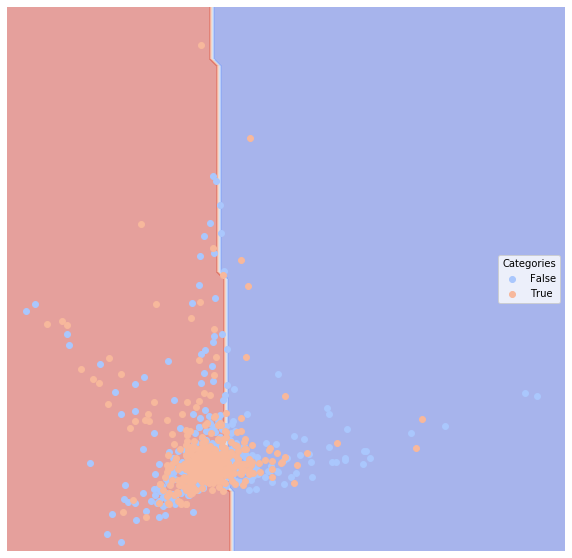

In [216]:
# check the region plots

df_sac_uncoded['category'] = df_sac_uncoded['pred_category_nn']
lucem_illud_2020.plotregions(sar_nn, df_sac_uncoded)

### Inference/Comment

It is time to make a summary for the methods we have applied to the corpus of sarcasm. I here would like to make a summary on the `precision score` of each methods: (for logistic, we only take the one with L1 penality, as we have checked that it performs better than the original logistic)
+ Logistic regression with L1 penality: 0.67
+ Naive Bayes: 0.63
+ Decision tree: 0.53
+ Ensemble - random forest: 0.60
+ k - NN: 0.63
+ SVM: 0.65
+ Neural Network: 0.62

From the summary of precision scores, we see that the best classifier among these methods is Logistic with L1 penality and SVM, with score above 65%, and the worst among all is decision tree with only about 53%. It is interesting to see that some algorithms with relatively simpler method tend to have good performance, like logistic with L1 penality and Naive bayes. The reason for their good performance may be that my labels in corpus are binary, not multi-class, so simple models can perform well, and complex models like k-NN, SVM, etc. are not performing far better, even worse, as they ofhen deal with multi-category classifications.